<a href="https://colab.research.google.com/github/guillermodulce/Data_Science_UTN/blob/main/TP_Final_UTN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reporte comercial Electro Retail Argentina

**Contexto:** Con una inversión inicial de $300 MM; los orígenes de **Electro Retail** se remontan a Septiembre de 2021, con la apertura de la primera sucursal en Buenos Aires, que  marcó el punto de partida para el desarrollo exitoso de un modelo de negocios distinto, disruptivo e innovador para el mercado. El crecimiento logrado por **Electro Retail**, permitió conquistar una posición destacada entre los players del sector. La compañía cuenta hoy con 150 empleados, profesionales con capacitación tecnológica que permiten dar respuesta a las necesidades del consumidor actual.

Con un fuerte crecimiento de facturación en el último semestre, **Electro Retail** despliega en sus sucursales el más amplio abanico de las categorías Notebooks, Consolas de Juego, TV`s y celulares, entre otras. Una oferta comercial estratégica, que engloba a las marcas líderes del mercado.

El plan de expansión 2023 prevé alcanzar las 30 tiendas; con foco en ciudades del interior de Argentina, con el propósito de amplificar la propuesta **Electro Retail** en todo el país.

**Interés de la investigación:** En este contexto, la dirección general entiende necesaria la optimización de recursos, a través del análisis de los datos generados por sus sucursales. En una etapa preliminar se determina realizar una prueba conceptual en la sucursal Norte GBA, de reciente apertura en febrero de 2023, la cual representa un desafío debido al volumen de datos con que se cuenta. Se deberá evaluar qué modelos de análisis estadístico y métricas son replicables en sucursales, tanto en funcionamiento como en próximas aperturas y determinar el valor que aporten al crecimiento de la companía.

Los primeros reportes deberán incluir, pero no limitarse a la siguiente información:

Evolución de ventas

1.   Ventas total diario y mensual
2.   Detalle por vendedor
3.   Detalle por rubro
4.   Ranking de productos más vendidos
5.   Participación de venta web

Columnas calculadas

1.   Venta neta
2.   Rentabilidad

Predicción de ventas

1.   Rentabilidad futura
2.   Evolución por rubro









**Origen de los datos:** La base de datos principal fue extraída de las consultas SQL del sistema de gestión interno de Electro Retail mediante Microsoft SQL Server. Se extraen el 100% de las operaciones de venta y notas de crédito de la sucursal Norte GBA en el período comprendido entre el 1/3/2023 y el 30/6/2023.

El dataset incluye las siguientes columnas relevantes:

fac_fecha: Fecha de la operación.

ped_codigo: Número de pedido.

comprob: Número de factura.

mar_descri: Marca del artículo.

unn_descri: Descripción de la familia de productos.

rubro: Categorización interna. Marca + familia.

art_numero: Sku o código del artículo.

art_descri: Descripción del modelo.

art_poriva: IVA aplicado según tipo de producto.

fac_cantid: Unidades incluidas en la operación.

art_pu: Precio unitario.

proteccion: Aporte de proveedor, mejora la rentabilidad y la competitividad.

recargo: Recargo financiero de la operación.

total_pesos: Total facturado.

total_costo_pesos: Costo total de lo facturado.

art_costo_usd: Costo en dólares estadounidenses a precio oficial.

art_pu_usd: Precio unitario en US dólares.

recargo_usd: Recargo financiero en US dólares.

total_usd: Total facturado en US dólares.

total_costo_usd: Costo total en US dólares.

usu_nombre_ped: Nombre del vendedor/a.

cld_localidad: Localidad del cliente.

pro_descri: Provincia del cliente.

fac_tipmov: Factura o Nota de crédito.

fac_dolar: Cotización del US dólar oficial al momento de la operación.



### Importación y exploración del dataset

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bd_ventas = pd.read_excel('/content/drive/MyDrive/Data Science/UTN - Data Science/TP Final/Base_mod_marzo-junio23.xlsx')

In [ ]:
bd_ventas.head(5)

,brand,division,fac_fecha,ped_codigo,comprob,cli_nombre,cli_cuit,mar_descri,unn_descri,rubro,...,depositoarmado,depositoretiro,nro_oc,fac_codigo,fac_tipmov,fac_dolar,ped_retira,ped_flete_bonificado,ped_web,cli_mail
0,ELECTRO RETAIL,GBA,2023-03-01,174006,FC B 1038-00000095,NaN,NaN,EPSON,Impresoras,EPSON Impresoras,...,GBA,---,NaN,174784,FC,204.0,1.0,0.0,0.0,NaN
1,ELECTRO RETAIL,GBA,2023-03-01,174235,FC B 1038-00000096,NaN,NaN,XIAOMI,Parlantes Portables,XIAOMI Parlantes Portables,...,GBA,---,NaN,175092,FC,204.0,1.0,0.0,0.0,NaN
2,ELECTRO RETAIL,GBA,2023-03-01,174245,FC B 1038-00000099,NaN,NaN,KINGSTON,Almacenamiento,KINGSTON Discos Internos,...,GBA,---,NaN,175101,FC,204.0,1.0,0.0,0.0,NaN
3,ELECTRO RETAIL,GBA,2023-03-01,174257,FC B 1038-00000100,NaN,NaN,MICROSOFT,Joysticks,MICROSOFT Joysticks,...,GBA,---,NaN,175111,FC,204.0,1.0,0.0,0.0,NaN
4,ELECTRO RETAIL,GBA,2023-03-01,174255,FC A 1038-00000015,NaN,NaN,SEAGATE,Almacenamiento,SEAGATE Discos Externos,...,GBA,---,NaN,175109,FC,204.0,1.0,0.0,0.0,NaN


Estructura del dataset

In [ ]:
bd_ventas.shape

(3926, 54)

Tipos de datos

In [ ]:
bd_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   brand                 3926 non-null   object        
 1   division              3926 non-null   object        
 2   fac_fecha             3926 non-null   datetime64[ns]
 3   ped_codigo            3926 non-null   int64         
 4   comprob               3926 non-null   object        
 5   cli_nombre            0 non-null      float64       
 6   cli_cuit              0 non-null      float64       
 7   mar_descri            3926 non-null   object        
 8   unn_descri            3926 non-null   object        
 9   rubro                 3926 non-null   object        
 10  subrubro              3926 non-null   object        
 11  art_numero            3926 non-null   object        
 12  art_fabcodigo         3926 non-null   object        
 13  art_barra         

In [ ]:
bd_ventas['depositoarmado']

0       GBA
1       GBA
2       GBA
3       GBA
4       GBA
       ... 
3921    GBA
3922    GBA
3923    GBA
3924    GBA
3925    GBA
Name: depositoarmado, Length: 3926, dtype: object

In [ ]:
bd_ventas.columns

Index(['brand', 'division', 'fac_fecha', 'ped_codigo', 'comprob', 'cli_nombre',
       'cli_cuit', 'mar_descri', 'unn_descri', 'rubro', 'subrubro',
       'art_numero', 'art_fabcodigo', 'art_barra', 'art_descri', 'art_poriva',
       'fac_cantid', 'art_costo', 'art_pu', 'fac_impint', 'proteccion',
       'flete', 'recargo', 'descuento', 'total_pesos', 'total_costo_pesos',
       'gp', 'art_costo_usd', 'art_pu_usd', 'fac_impint_usd', 'proteccion_usd',
       'flete_usd', 'recargo_usd', 'descuento_usd', 'total_usd',
       'total_costo_usd', 'usu_nombre_ped', 'usu_nombre_cli', 'cld_localidad',
       'pro_descri', 'pco_diaven', 'pco_descri', 'canal', 'subcanal',
       'depositoarmado', 'depositoretiro', 'nro_oc', 'fac_codigo',
       'fac_tipmov', 'fac_dolar', 'ped_retira', 'ped_flete_bonificado',
       'ped_web', 'cli_mail'],
      dtype='object')

Eliminar columnas repetidas y que no sirven:

In [ ]:
df = bd_ventas.drop(['brand', 'division', 'comprob', 'cli_nombre', 'cli_cuit', 'subrubro', 'flete', 'flete_usd', 'art_fabcodigo', 'art_barra', 'art_costo', 'fac_impint', 'descuento', 'gp', 'fac_impint_usd', 'descuento_usd', 'usu_nombre_cli', 'pco_diaven', 'pco_descri', 'canal', 'subcanal', 'depositoretiro', 'nro_oc', 'ped_retira', 'ped_flete_bonificado', 'usu_nombre_cli', 'ped_web', 'fac_codigo', 'cli_mail'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fac_fecha          3926 non-null   datetime64[ns]
 1   ped_codigo         3926 non-null   int64         
 2   mar_descri         3926 non-null   object        
 3   unn_descri         3926 non-null   object        
 4   rubro              3926 non-null   object        
 5   art_numero         3926 non-null   object        
 6   art_descri         3926 non-null   object        
 7   art_poriva         3926 non-null   float64       
 8   fac_cantid         3926 non-null   int64         
 9   art_pu             3926 non-null   float64       
 10  proteccion         3926 non-null   float64       
 11  recargo            3926 non-null   float64       
 12  total_pesos        3926 non-null   float64       
 13  total_costo_pesos  3926 non-null   float64       
 14  art_cost

In [ ]:
df.head(5)

,fac_fecha,ped_codigo,mar_descri,unn_descri,rubro,art_numero,art_descri,art_poriva,fac_cantid,art_pu,...,proteccion_usd,recargo_usd,total_usd,total_costo_usd,usu_nombre_ped,cld_localidad,pro_descri,depositoarmado,fac_tipmov,fac_dolar
0,2023-03-01,174006,EPSON,Impresoras,EPSON Impresoras,C11CH96303,IMPRESORA MULTIFUNCIÓN EPSON L14150 A3 WIFI RE...,21.0,1,247933.06,...,0.0,0.0,1215.36,646.14,Micaela,PILAR,BUENOS AIRES - INTERIOR,GBA,FC,204.0
1,2023-03-01,174235,XIAOMI,Parlantes Portables,XIAOMI Parlantes Portables,QBH4197GL,PARLANTE XIAOMI MI PORTABLE OUTDOOR SPEA,21.0,1,21486.78,...,0.0,0.0,105.33,63.65,Micaela,CAPITAL FEDERAL,CABA,GBA,FC,204.0
2,2023-03-01,174245,KINGSTON,Almacenamiento,KINGSTON Discos Internos,SNV2S/500G,DISCO RIGIDO INTERNO KINGSTON SSD 500GB M.2 NV...,10.5,1,14478.73,...,0.0,0.0,70.97,44.42,Matias,PILAR,BUENOS AIRES - INTERIOR,GBA,FC,204.0
3,2023-03-01,174257,MICROSOFT,Joysticks,MICROSOFT Joysticks,QAU-00011,GAMEPAD MICROSOFT XBOX S/X INALAMBRICO PULSE RED,21.0,1,24792.56,...,0.0,0.0,121.53,65.06,Nahuel,PILAR,BUENOS AIRES - INTERIOR,GBA,FC,204.0
4,2023-03-01,174255,SEAGATE,Almacenamiento,SEAGATE Discos Externos,STKM1000400,DISCO DURO EXTERNO SEAGATE EXPANSION 1TB NEGRO,10.5,1,17736.65,...,0.0,0.0,86.94,53.27,Matias,BOULOGNE,BUENOS AIRES - INTERIOR,GBA,FC,204.0


Agregar nuevas columnas: Venta Neta

In [ ]:
df['total_pesos'] =  df['total_pesos'].astype('int64')

In [ ]:
df['venta_neta'] = df.apply(lambda x: x['total_pesos'] - x['recargo'], axis = 1)
df['venta_neta_usd'] = df.apply(lambda x: x['total_usd'] - x['recargo_usd'], axis = 1)

df['venta_neta'].describe()

count    3.926000e+03
mean     6.029736e+04
std      1.105534e+05
min     -1.113121e+06
25%      4.072000e+03
50%      1.807499e+04
75%      7.437600e+04
max      1.683926e+06
Name: venta_neta, dtype: float64

Agregar nuevas columnas: Rentabilidad

In [ ]:
df['rentabilidad'] = df.apply(lambda x: x['venta_neta'] + x['proteccion']- x['total_costo_pesos'], axis = 1)
df['rentabilidad_usd'] = df.apply(lambda x: x['venta_neta_usd'] + x['proteccion_usd']- x['total_costo_usd'], axis = 1)

df['rentabilidad'].describe()

count    3.926000e+03
mean     2.537032e+04
std      5.676122e+04
min     -4.244519e+05
25%      1.607352e+03
50%      7.278060e+03
75%      2.420342e+04
max      1.322440e+06
Name: rentabilidad, dtype: float64

Modificar columnas: Fecha

In [ ]:
df['year_month_day'] = df['fac_fecha'].dt.strftime('%Y-%m-%d')
df['year_month_day']

0       2023-03-01
1       2023-03-01
2       2023-03-01
3       2023-03-01
4       2023-03-01
           ...    
3921    2023-06-30
3922    2023-06-30
3923    2023-06-30
3924    2023-06-30
3925    2023-06-30
Name: year_month_day, Length: 3926, dtype: object

In [ ]:
df['year_month'] = df['fac_fecha'].dt.strftime('%Y-%m')
df['year_month']

0       2023-03
1       2023-03
2       2023-03
3       2023-03
4       2023-03
         ...   
3921    2023-06
3922    2023-06
3923    2023-06
3924    2023-06
3925    2023-06
Name: year_month, Length: 3926, dtype: object

In [ ]:
ventas_por_mes = df['year_month'].value_counts()
ventas_por_mes

2023-04    1069
2023-05    1048
2023-06     915
2023-03     894
Name: year_month, dtype: int64

In [ ]:
df['week'] = df['fac_fecha'].dt.strftime('%W')
df['week']

0       09
1       09
2       09
3       09
4       09
        ..
3921    26
3922    26
3923    26
3924    26
3925    26
Name: week, Length: 3926, dtype: object

Modificar precisión de decimales

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.describe()

,ped_codigo,art_poriva,fac_cantid,art_pu,proteccion,recargo,total_pesos,total_costo_pesos,art_costo_usd,art_pu_usd,proteccion_usd,recargo_usd,total_usd,total_costo_usd,fac_dolar,venta_neta,venta_neta_usd,rentabilidad,rentabilidad_usd
count,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00,3926.00
mean,232537.63,17.88,2.55,59530.83,1862.30,1156.36,61453.72,36789.33,156.60,256.46,7.97,5.04,264.78,158.62,232.37,60297.36,259.74,25370.32,109.09
std,55241.67,4.80,98.94,109113.15,14181.78,7445.39,112145.82,65380.79,275.35,463.17,58.05,32.42,476.67,279.41,18.26,110553.40,469.62,56761.22,237.47
min,0.00,10.50,-2.00,-1113121.27,0.00,-37891.74,-1113121.00,-688669.07,-2664.10,-4306.08,0.00,-168.41,-4306.08,-2664.10,204.00,-1113121.00,-4306.08,-424451.93,-1641.98
25%,205024.00,10.50,1.00,4048.76,0.00,0.00,4072.00,2388.70,10.78,16.91,0.00,0.00,17.30,10.85,217.00,4072.00,17.17,1607.35,6.97
50%,231851.00,21.00,1.00,16650.68,0.00,0.00,18098.00,9448.09,41.27,74.98,0.00,0.00,79.05,42.23,229.00,18074.99,77.24,7278.06,32.08
75%,273299.50,21.00,1.00,72397.29,0.00,0.00,74379.00,49160.84,219.38,306.80,0.00,0.00,316.32,221.08,245.00,74376.00,311.03,24203.42,103.77
max,300517.00,21.00,6200.00,1683926.45,475041.12,160219.83,1683926.00,836527.15,3527.17,6501.65,1834.14,715.27,6501.65,3527.17,267.00,1683926.00,6501.65,1322439.97,5105.96


Hay un total de 3926 registros en el dataset.


Hay una columna cuyo fac_cant es de 6200 unidades. Esto corresponde a la carga manual de un envío a domicilio. Se procede a su eliminación para continuar con el análisis.

También es necesario filtrar las notas de crédito para analizar las unidades y precios de venta, ya que se desvirtúan ampliamente algunos valores, como la media y la desviación estándar.

No obstante, para el análisis de volumenes de venta y unidades vendidas, las notas de crédito sí deben considerarse, ya que de naturalmente afectan al resultado final.


Eliminar outliers


In [ ]:
df = df.query("fac_cantid <= 1000")

Renombrar columnas

In [ ]:
df.loc[df['usu_nombre_ped'] == 'Web ELECTRO RETAIL', 'usu_nombre_ped'] = 'Web'


Filtrar Notas de Crédito

In [ ]:
nc = df.loc[df['total_pesos']<0]
nc.head(5)

,fac_fecha,ped_codigo,mar_descri,unn_descri,rubro,art_numero,art_descri,art_poriva,fac_cantid,art_pu,...,depositoarmado,fac_tipmov,fac_dolar,venta_neta,venta_neta_usd,rentabilidad,rentabilidad_usd,year_month_day,year_month,week
60,2023-03-04,0,MICROSOFT,Consolas,MICROSOFT Consolas,RRT-00002GPUL1M,MICROSOFT XBOX SERIES X+GAME PASS ULTIMATE 1 MES,21.00,-1,-206610.74,...,GBA,NC,205.50,-206610.00,-1005.41,-80015.83,-389.38,2023-03-04,2023-03,09
71,2023-03-04,0,ACER,Notebooks,ACER Notebooks,A515-54-51RS-AR_GP1,"NOTEBOOK ACER ASPIRE 5 15,6” CORE I5 8GB 256GB...",10.50,-1,-166514.93,...,GBA,NC,205.50,-166514.00,-810.29,-28837.22,-140.33,2023-03-04,2023-03,09
72,2023-03-04,0,FIFA,Sillas Gaming,FIFA Sillas Gaming,F1-2700BRASIL,FIFA SILLAS GAMING MT-2000 (BW1) - BRASIL,21.00,-1,-41321.49,...,GBA,NC,205.50,-41321.00,-201.08,-4125.71,-20.08,2023-03-04,2023-03,09
116,2023-03-05,0,XIAOMI,Auriculares,XIAOMI Auriculares,BHR5489GL,AURICULARES XIAOMI REDMI BUDS 3 LITE BLACK,10.50,-1,-8143.89,...,GBA,NC,205.50,-8143.00,-39.63,-1726.13,-8.40,2023-03-05,2023-03,09
133,2023-03-05,0,JBL,Auriculares,JBL Auriculares,JBLT500BLKAM,AURICULARES JBL TUNE500 BLACK,21.00,-1,-8263.64,...,GBA,NC,205.50,-8263.00,-40.21,-4303.01,-20.94,2023-03-05,2023-03,09


Df sin Notas de Crédito

In [ ]:
df_sin_nc = df.loc[df['total_pesos']>0]
df_sin_nc.head(5)

,fac_fecha,ped_codigo,mar_descri,unn_descri,rubro,art_numero,art_descri,art_poriva,fac_cantid,art_pu,...,depositoarmado,fac_tipmov,fac_dolar,venta_neta,venta_neta_usd,rentabilidad,rentabilidad_usd,year_month_day,year_month,week
0,2023-03-01,174006,EPSON,Impresoras,EPSON Impresoras,C11CH96303,IMPRESORA MULTIFUNCIÓN EPSON L14150 A3 WIFI RE...,21.00,1,247933.06,...,GBA,FC,204.00,247933.00,1215.36,116120.62,569.22,2023-03-01,2023-03,09
1,2023-03-01,174235,XIAOMI,Parlantes Portables,XIAOMI Parlantes Portables,QBH4197GL,PARLANTE XIAOMI MI PORTABLE OUTDOOR SPEA,21.00,1,21486.78,...,GBA,FC,204.00,21486.00,105.33,8502.16,41.68,2023-03-01,2023-03,09
2,2023-03-01,174245,KINGSTON,Almacenamiento,KINGSTON Discos Internos,SNV2S/500G,DISCO RIGIDO INTERNO KINGSTON SSD 500GB M.2 NV...,10.50,1,14478.73,...,GBA,FC,204.00,14478.00,70.97,5416.07,26.55,2023-03-01,2023-03,09
3,2023-03-01,174257,MICROSOFT,Joysticks,MICROSOFT Joysticks,QAU-00011,GAMEPAD MICROSOFT XBOX S/X INALAMBRICO PULSE RED,21.00,1,24792.56,...,GBA,FC,204.00,24792.00,121.53,11519.25,56.47,2023-03-01,2023-03,09
4,2023-03-01,174255,SEAGATE,Almacenamiento,SEAGATE Discos Externos,STKM1000400,DISCO DURO EXTERNO SEAGATE EXPANSION 1TB NEGRO,10.50,1,17736.65,...,GBA,FC,204.00,17736.00,86.94,6869.37,33.67,2023-03-01,2023-03,09


In [ ]:
df_sin_nc.describe()

,ped_codigo,art_poriva,fac_cantid,art_pu,proteccion,recargo,total_pesos,total_costo_pesos,art_costo_usd,art_pu_usd,proteccion_usd,recargo_usd,total_usd,total_costo_usd,fac_dolar,venta_neta,venta_neta_usd,rentabilidad,rentabilidad_usd
count,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00,3808.00
mean,239620.56,17.87,1.03,63647.43,1920.00,1215.78,65740.37,39492.22,168.02,274.31,8.21,5.30,283.40,170.39,232.54,64524.59,278.10,26952.37,115.92
std,38048.62,4.80,0.19,105590.79,14396.04,7501.96,108442.45,62571.97,263.99,448.21,58.93,32.65,460.74,267.26,18.27,106843.80,453.68,56166.81,234.85
min,173958.00,10.50,1.00,742.98,0.00,0.00,742.00,3.00,0.01,3.50,0.00,0.00,3.50,0.01,204.00,742.00,3.50,-1370.42,-6.52
25%,208660.50,10.50,1.00,4461.98,0.00,0.00,4523.00,2572.11,11.19,18.47,0.00,0.00,18.69,11.23,217.50,4523.00,18.69,1689.76,7.42
50%,233231.00,21.00,1.00,19833.88,0.00,0.00,19908.00,10688.43,46.14,86.28,0.00,0.00,88.31,46.51,229.50,19908.00,87.10,8300.50,35.46
75%,273957.75,21.00,1.00,74379.34,0.00,0.00,76921.25,52040.83,222.10,318.40,0.00,0.00,330.16,222.84,247.00,74796.00,323.35,25012.73,108.79
max,300517.00,21.00,5.00,1683926.45,475041.12,160219.83,1683926.00,836527.15,3527.17,6501.65,1834.14,715.27,6501.65,3527.17,267.00,1683926.00,6501.65,1322439.97,5105.96


Hay un total de 3808 registros en el dataset, luego de filtrar las notas de crédito.

**Columna "fac_cantidad"**

*   La cantidad promedio de artículos por factura es aproximadamente 1
*   La desviación estándar indica la variabilidad de los datos. En este caso, la desviación estándar es aproximadamente 0.19, lo que implica que la mayoría de los pedidos tienen una cantidad de artículos igual a 1.
* Valor mínimo (min): El valor mínimo observado en la columna "fac_cant" es 1, lo que indica que hay órdenes de compra que incluyen al menos un artículo.
* Percentiles: Los percentiles son medidas que dividen una distribución de datos en porcentajes específicos. El 75% de las órdenes de compra tienen una cantidad de artículos igual o inferior a 1.
* El valor máximo observado en la columna "fac_cant" es 5, lo que indica que hay órdenes de compra que incluyen hasta 5 artículos.

**Para la columna "venta_neta":**

* Media (mean): El ticket promedio de las ventas por orden de compra es de aproximadamente ARS $ 64524.59.

* Desviación estándar (std): La desviación estándar es $ 106843.80. Esta variación es muy alta, y se explica por la gran amplitud en los precios de los artículos vendidos.

* Valor mínimo (min): $ 742.00. El artículo mas barato (un accesorio) cuesta esto.

* Valor máximo (max): $ 1683926.00. Este es el valor de la artículo mas caro, en este caso corresponde a una notebook.

* Percentiles:
Percentil 25 (25%): El 25% de las órdenes de compra tienen un precio igual o
inferior a $ 4523.00.

Percentil 50 (50%): El 50% de las órdenes de compra tienen un precio igual o inferior a $ 19908.00. y el 50% por encima.

Percentil 75 (75%): El 75% de las órdenes de compra tienen un precio igual o inferior a $ 74796.00. Un 25% por encima.


*En este caso, la media (64524.59) y la mediana (19908.00) tienen una diferencia amplia en sus valores, por lo cual podemos inferir que hay valores atipicos en cuanto al precio de las mismas, o el rango de precios de productos en el catálogo es muy amplio.***




## Limpieza de datos

In [ ]:
df_sin_nc.isnull().sum()

fac_fecha              0
ped_codigo             0
mar_descri             0
unn_descri             0
rubro                  0
art_numero             0
art_descri             0
art_poriva             0
fac_cantid             0
art_pu                 0
proteccion             0
recargo                0
total_pesos            0
total_costo_pesos      0
art_costo_usd          0
art_pu_usd             0
proteccion_usd         0
recargo_usd            0
total_usd              0
total_costo_usd        0
usu_nombre_ped         0
cld_localidad        138
pro_descri             0
depositoarmado         0
fac_tipmov             0
fac_dolar              0
venta_neta             0
venta_neta_usd         0
rentabilidad           0
rentabilidad_usd       0
year_month_day         0
year_month             0
week                   0
dtype: int64

In [ ]:
nulos = df_sin_nc['cld_localidad'].isnull()
nulos

porcentaje_nulos = nulos.mean() * 100
porcentaje_nulos

3.623949579831933

Reemplazamos los valores nulos por "sin_datos"

In [ ]:
# categorical
df_sin_nc['cld_localidad'] = df_sin_nc['cld_localidad'].fillna('sin_datos')

<ipython-input-28-82c6188659ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nc['cld_localidad'] = df_sin_nc['cld_localidad'].fillna('sin_datos')


In [ ]:
df_sin_nc.duplicated().sum()

2

Recomendaciones limpieza de datos (esto lo copio para tenerlo a mano ;-))
1. Ver si tengo valores nulos y NAN
2. Ver cuanto representan del total de cada columna:

```
# Ver los valores nulos de la columna 'category'
nulos = df['category'].isnull()

# Calcular el porcentaje de valores nulos en la columna 'category'
porcentaje_nulos = nulos.mean() * 100
```
3. Ver la distribucion de nulos en cada columna graficamente
4. NO hay soluciones acordadas para tratar con los datos faltantes. Tenemos que estudiar la característica específica y el conjunto de datos para decidir la mejor manera de manejarlos.

* Eliminar
* Imputar

Dependiendo la importancia de la columna para la investigacion y el porcentaje de valores nulos.



```
# Imputar en los nulos el valor de la media en la columna 'price'
media = df['price'].mean()
df['price'] = df['price'].fillna(media)
```
Para características categóricas, podemos agregar una nueva categoría con un valor como "_MISSING_".



```
# categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')
```
**Mas ejemplos para tus casos especificos:** [Manejo de datos faltantes](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d)

[Practica con W3Schools](https://www.w3schools.com/python/pandas/pandas_cleaning.asp)

# Visualización de datos

Ventas por rubro

In [ ]:
rubros = df.unn_descri.value_counts()
rubros

Auriculares                      591
Celulares                        477
Televisores                      322
Film Protector                   272
Joysticks                        250
Insumos de Impresion             215
Consolas                         179
Mouses                           165
Notebooks                        154
Cargadores Celulares             125
Cables Celulares                  98
Soportes TV                       98
Pendrives                         83
Impresoras                        81
Almacenamiento                    77
Logistica                         48
Auriculares Gaming                47
Parlantes Portables               45
Torres de Sonido                  43
Tablets                           43
Monitores                         34
Mouses Gaming                     29
Discos Internos                   29
Heladeras                         26
Resmas                            26
Cafeteras                         24
Lavarropas                        24
S

<Axes: >

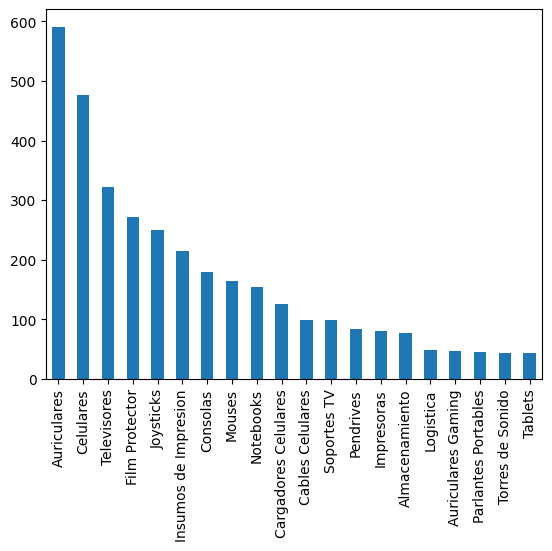

In [ ]:
rubros.head(20).plot.bar()

Artículos más vendidos

In [ ]:
articulos = df.art_descri.value_counts()
articulos

FILM PROTECTOR HIDROGEL PREMIUM HAXLY                134
AURICULARES EUROSOUND ES-BB2109 BLACK                121
AURICULARES EUROSOUND ES-BB2109 ROSA                  95
FILM PROTECTOR HIDROGEL PREMIUM CURVO  HAXLY 50       78
TV LED PHILIPS 43 FHD 43PFD6917/77 ANDROID            55
                                                    ... 
LAVASECARROPAS DREAN LSCDR1106I INVERTER               1
LAVASECARROPAS MIDEA WD-LC312SAR1 12/8KG INVERTER      1
DISCO GAMER LEXAR PS5 1TB                              1
ASPIRADORA INALAMBRICA MIDEA 2 EN 1 VS-U016WAR1        1
BAND XIAOMI REDMI SMARTBAND 2 GL BLACK                 1
Name: art_descri, Length: 602, dtype: int64

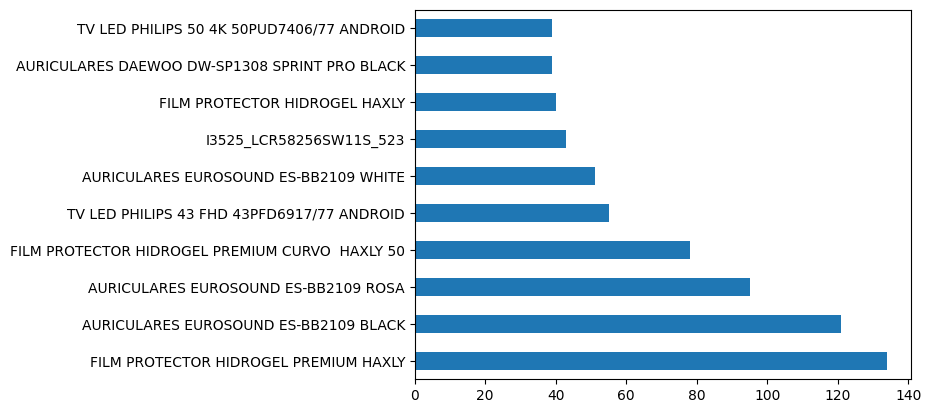

In [ ]:
ax = articulos.head(10).plot.barh()

7 de los 10 artículos más vendidos, corresponden a accesorios: 4 modelos de auriculares y 3 de hidrogel protector para celulares. La lista se completa con 2 televisores y 1 notebook.

## Matplotlib

Importación de Matplotlib

In [ ]:
# Importacion de matplotlib
import matplotlib.pyplot as plt

Boxplot de rango de precios (min 742.98, max 1683926.45)

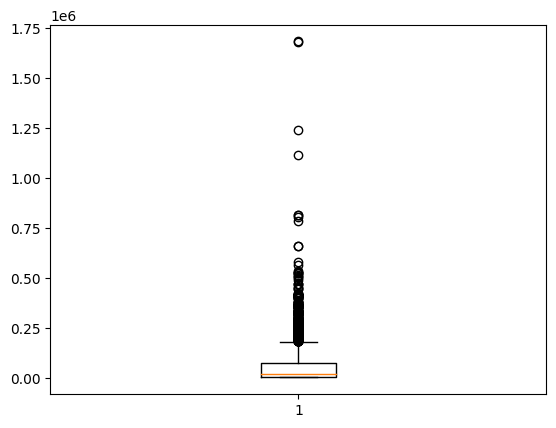

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(df_sin_nc['art_pu'])
plt.show()

In [ ]:
df_sin_nc['art_pu'].describe()

count      3808.00
mean      63647.43
std      105590.79
min         742.98
25%        4461.98
50%       19833.88
75%       74379.34
max     1683926.45
Name: art_pu, dtype: float64

El boxplot de precio unitario por artículo evidencia el amplio rango en los valores de los artículos, que van desde los 742.98 pesos hasta el máximo de 1,683,926.45. El precio promedio de los artículos en el periodo analizado es de 63647.43

In [ ]:
rubros_top10 = rubros.head(10)

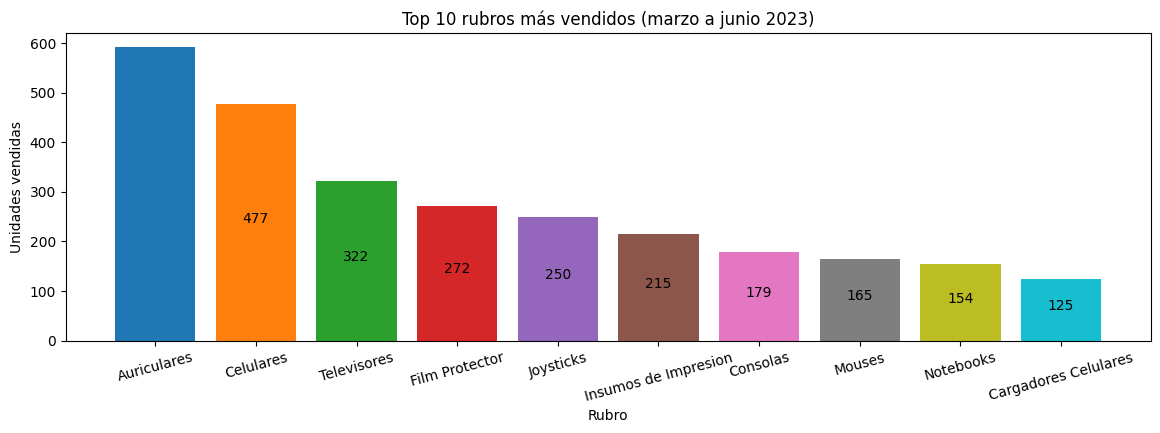

In [ ]:
import matplotlib.colors as mcolors

# Obtener una lista de colores predefinidos de Matplotlib
colores = list(mcolors.TABLEAU_COLORS.keys())

# Agreagar etiquetas de valores
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)):
        plt.text(i, y_list[i]//2, y_list[i], ha="center")

# Crear el gráfico de barras con colores predefinidos
plt.figure(figsize=(14, 4))
plt.bar(rubros_top10.index, rubros_top10.values, color=colores)
add_value_label(rubros_top10.index, rubros_top10.values)


# Personalizar el gráfico

plt.xlabel('Rubro')
plt.ylabel('Unidades vendidas')
plt.title('Top 10 rubros más vendidos (marzo a junio 2023)')
plt.xticks(rotation=15)

# Mostrar el gráfico
plt.show()


Agrupar vendedores

In [ ]:
grupos_vendedores = df.groupby('usu_nombre_ped')

# Iterar sobre los grupos y mostrar solo la columna 'usu_nombre_ped'
for nombre_grupo, grupo in grupos_vendedores:
    print(f"Grupo: {nombre_grupo}")
    print(grupo['venta_neta'].sum())
    print()

Grupo: Brenda
36630108.81

Grupo: Candela
36378679.04

Grupo: Federico
447536.13

Grupo: Matias
34684029.739999995

Grupo: Micaela
37195219.019999996

Grupo: Nahuel
49922747.18

Grupo: Nicolas
33800602.59

Grupo: Web
7663377.57



In [ ]:
vol_ventas_vendedor = {}
for nombre_grupo, grupo in grupos_vendedores:
    vol_ventas_vendedor[nombre_grupo] = grupo['venta_neta'].sum()
print(vol_ventas_vendedor)

{'Brenda': 36630108.81, 'Candela': 36378679.04, 'Federico': 447536.13, 'Matias': 34684029.739999995, 'Micaela': 37195219.019999996, 'Nahuel': 49922747.18, 'Nicolas': 33800602.59, 'Web': 7663377.57}


Proporción de ventas por vendedor

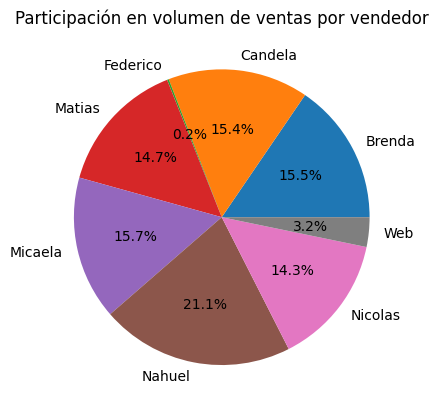

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.pie(vol_ventas_vendedor.values(), labels=vol_ventas_vendedor.keys(), autopct='%1.1f%%')
plt.title('Participación en volumen de ventas por vendedor')
plt.figure()
plt.show()

In [ ]:
df['usu_nombre_ped'].unique()

array(['Micaela', 'Matias', 'Nahuel', 'Candela', 'Brenda', 'Web',
       'Nicolas', 'Federico'], dtype=object)

Proporción de tickets por vendedor

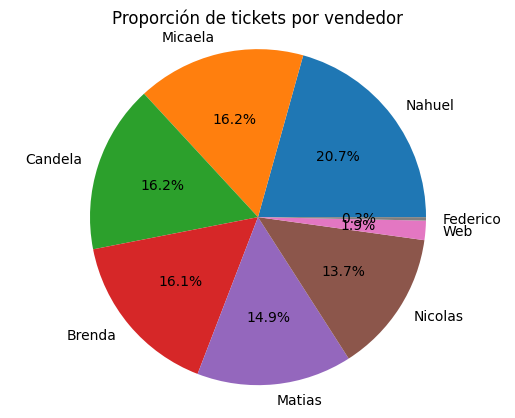

In [ ]:
# Gráfico circular: Proporción de tickets por vendedor
categoria_proporcion = df['usu_nombre_ped'].value_counts() / len(df) * 100
plt.figure()
plt.pie(categoria_proporcion.values, labels=categoria_proporcion.index, autopct='%1.1f%%')
plt.title('Proporción de tickets por vendedor')
plt.axis('equal')
plt.show()


**Venta Web**

 En el período analizado (1/3/23 al 30/6/23) la participación de venta web ha sido el siguiente:


*   3.2 % del volumen de ventas facturado

*   1.9 % del total de tickets emitidos










Gráfico de ventas diarias y mensuales por vendedor.


Venta neta por semana

In [ ]:
ventas_semana = df.groupby('week')['venta_neta'].sum()

print(ventas_semana.head(15))
ventas_semana.describe()

week
09    9084425.29
10   10206722.57
11   12159197.80
12   11796218.86
13    8456237.04
14   13568416.41
15   12463007.75
16   17049033.24
17   20644673.95
18   10887568.18
19   24175555.64
20    9260618.57
21   13247670.51
22   11540102.95
23    9193369.59
Name: venta_neta, dtype: float64


count         18.00
mean    13151238.89
std      4895817.22
min      6217202.94
25%      9497144.57
50%     11977708.33
75%     14668746.35
max     24175555.64
Name: venta_neta, dtype: float64

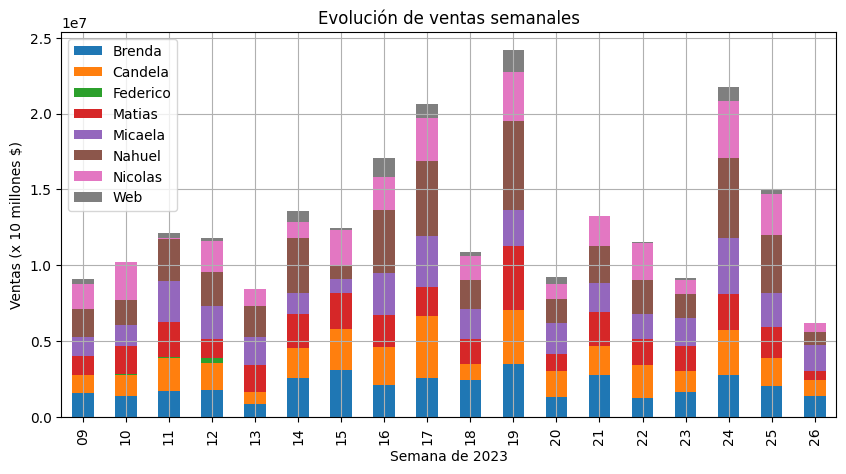

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por vendedor y fecha, y sumar las ventas
grupos_vendedores = df.groupby(['usu_nombre_ped', 'week'])['venta_neta'].sum().reset_index()

pivote = grupos_vendedores.pivot(index='week', columns='usu_nombre_ped', values='venta_neta')

# Graficar barras apiladas
pivote.plot(kind='bar', stacked=True, figsize=(10, 5))

# Personalizar gráfico
plt.xlabel('Semana de 2023')
plt.ylabel('Ventas (x 10 millones $)')
plt.title('Evolución de ventas semanales')
plt.legend(loc='upper left')
plt.grid()


plt.show()

La semana de mayor ventas dentro del periodo analizado fue la 19 (del 8 al 14 de mayo) con un volumen de facturación de $ 23,149,277.64.-

La semana completa con menor volumen de facturación fue la 13 (entre el 27/3 y el 2/4) con $ 8,515,355.04.-

No se toma en cuenta la semana 26 ya que nuestra base de análisis no nos proporciona datos para la semana completa ya que contiene datos hasta el 30/6.

En el gráfico de ventas diarias se destaca el pico de ventas del día 17/6, previo al día del padre en Argentina, superando los 6 millones y medio de pesos. Por otra parte, el día 22/6, se realizó una nota de crédito superior al volumen facturado ese día, por lo cual se produjo un cierre de caja negativo.

Venta neta por mes

In [ ]:
df['mes'] = df['fac_fecha'].dt.to_period('M')
ventas_mes = df.groupby('mes')['venta_neta'].sum()

print(ventas_mes.head(5))
ventas_mes.describe()

mes
2023-03   47770564.42
2023-04   67657368.49
2023-05   62200498.80
2023-06   59093868.37
Freq: M, Name: venta_neta, dtype: float64


count          4.00
mean    59180575.02
std      8389911.15
min     47770564.42
25%     56263042.38
50%     60647183.58
75%     63564716.22
max     67657368.49
Name: venta_neta, dtype: float64

Volumen de venta por vendedor por mes

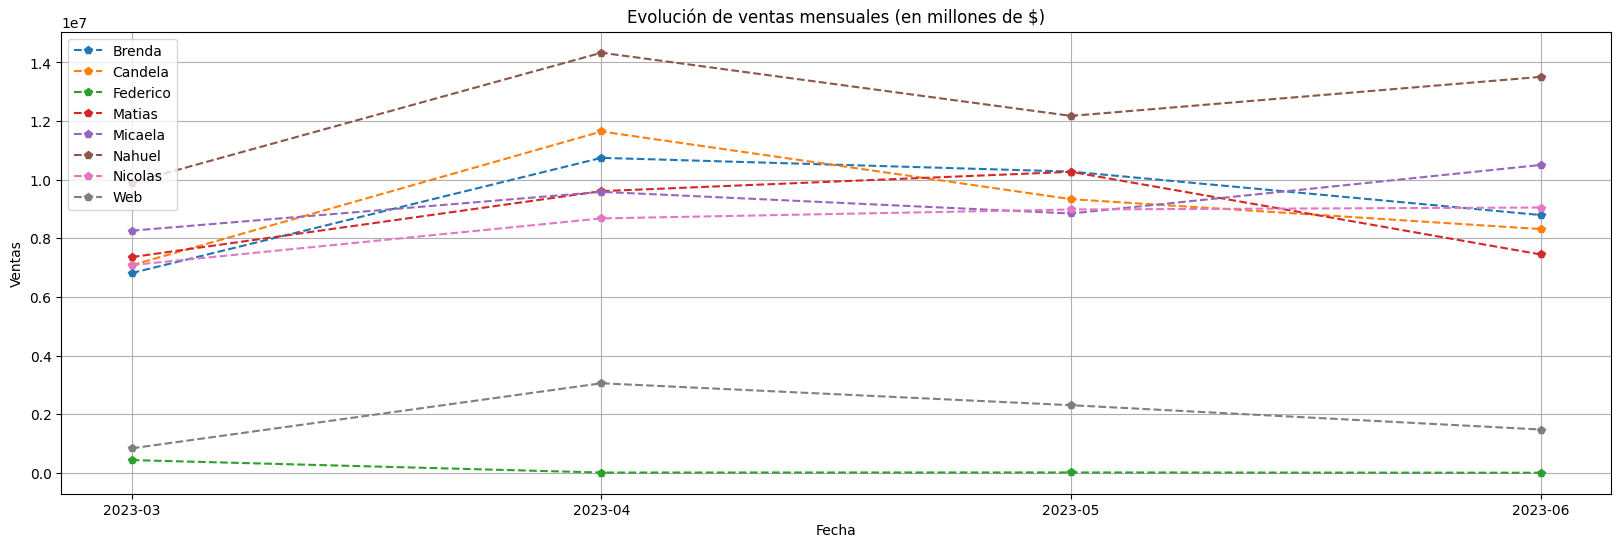

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por categoría de ventas y mes, y sumar los ingresos
grupos_vendedores = df.groupby(['usu_nombre_ped', 'year_month'])['venta_neta'].sum().reset_index()

# Crear el gráfico de líneas para cada categoría

plt.figure(figsize=(20, 6))
for usu_nombre_ped, data in grupos_vendedores.groupby('usu_nombre_ped'):
    plt.plot(data['year_month'], data['venta_neta'], label=usu_nombre_ped, marker='p', linestyle='dashed')

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Evolución de ventas mensuales (en millones de $)')
plt.legend()
plt.grid()

#plt.ylim(0000000, 20000)

# Mostrar el gráfico
plt.show()


En las ventas mensuales por vendedor se destaca un vendedor, quien en los meses analizados se ubica claramente por encima del resto. Luego tenemos un grupo de 5 vendedores, cuyo desempeño es más parejo y alternan su performance a través de los meses. En la franja baja se ubica la participación de la venta web, que está descendiendo en los últimos 3 meses.

Volumen de rentabilidad bruta por vendedor por mes

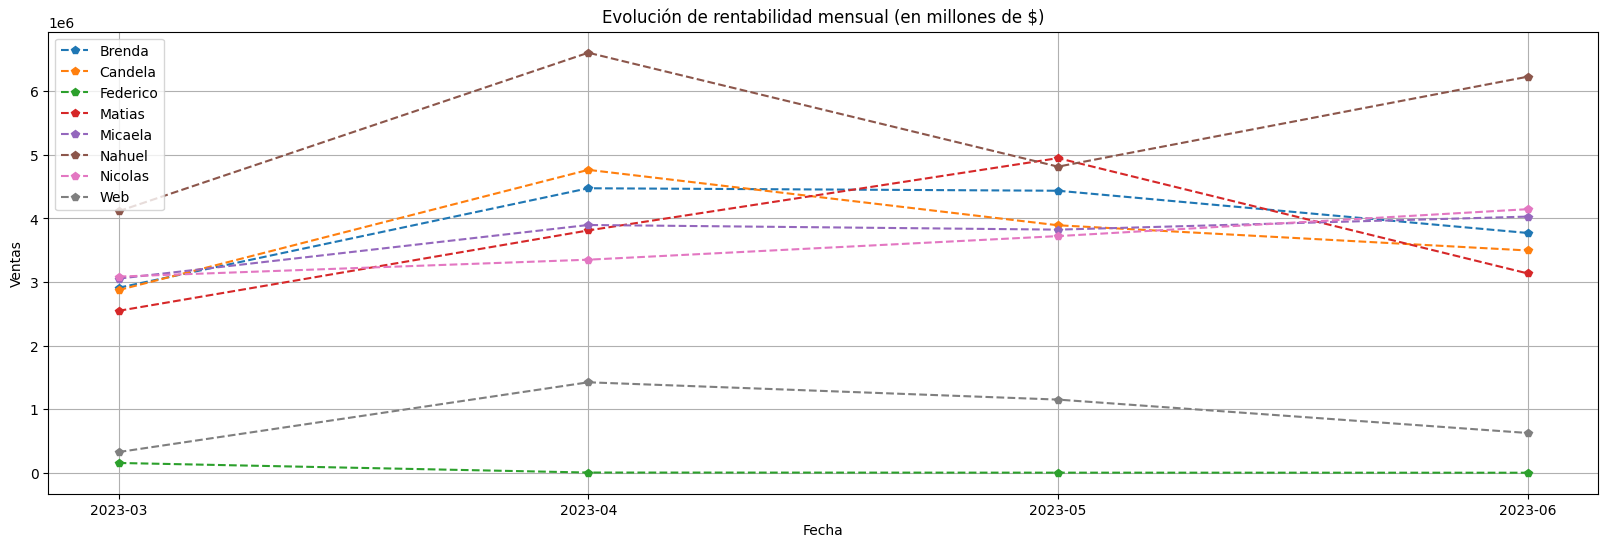

In [ ]:
# Agrupar los datos por categoría de ventas y mes, y sumar los ingresos
grupos_vendedores_renta = df.groupby(['usu_nombre_ped', 'year_month'])['rentabilidad'].sum().reset_index()

# Crear el gráfico de líneas para cada categoría

plt.figure(figsize=(20, 6))
for usu_nombre_ped, data in grupos_vendedores_renta.groupby('usu_nombre_ped'):
    plt.plot(data['year_month'], data['rentabilidad'], label=usu_nombre_ped, marker='p', linestyle='dashed')

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Evolución de rentabilidad mensual (en millones de $)')
plt.legend()
plt.grid()

#plt.ylim(0000000, 20000)

# Mostrar el gráfico
plt.show()


En el mes de mayo vemos una particularidad, ya que el vendedor con más volumen facturado no fue el de mayor rentabilidad.

Otras graficas en matplotlib: https://aprendeconalf.es/docencia/python/manual/matplotlib/

https://matplotlib.org/stable/gallery/index.html

## Seaborn

Importación de Seaborn

In [ ]:
# Importacion de seaborn
import seaborn as sns

Ventas totales por mes

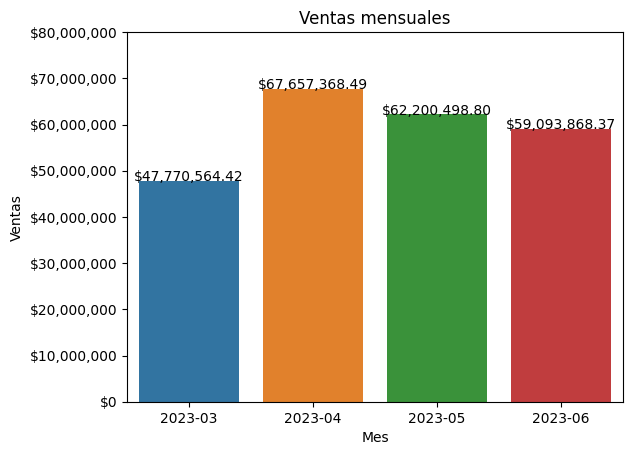

In [ ]:
# Gráfico de barras
ax = sns.barplot(x=ventas_mes.index, y=ventas_mes.values)

# Etiquetas con formato de moneda
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    # Formato de moneda
    valor = '${:,.2f}'.format(y)

    ax.text(x, y, valor, ha='center')

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Ventas mensuales')

# Formato eje Y
plt.yticks(plt.yticks()[0], ('${:,.0f}'.format(x) for x in plt.yticks()[0]))

plt.show()


En las ventas totales por mes se destaca el crecimiento en el volumen facturado en abril, en relación a marzo, que fue el primer mes completo luego de la apertura de la sucursal. De marzo a junio hay una baja en el volumen facturado. Luego de analizar las ventas por rubro, los stocks disponibles y los eventos estacionales, estaremos en condiciones de determinar el origen de esta variación.

Rentabilidad bruta por mes

In [ ]:
df['mes'] = df['fac_fecha'].dt.to_period('M')
renta_mes = df.groupby('mes')['rentabilidad'].sum()

print(renta_mes)

mes
2023-03   19059015.62
2023-04   28328477.94
2023-05   26786546.15
2023-06   25429807.66
Freq: M, Name: rentabilidad, dtype: float64


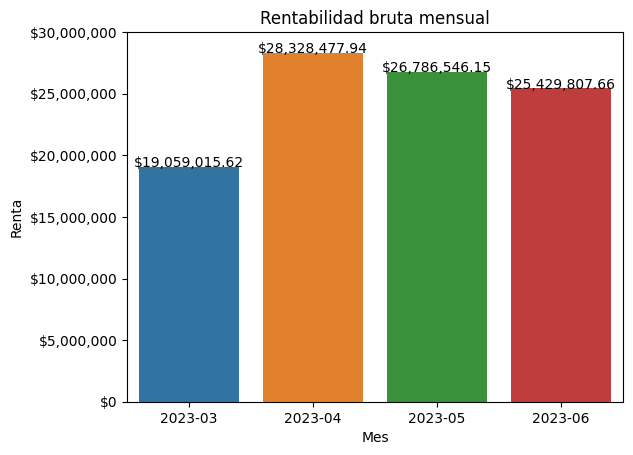

In [ ]:
# Gráfico de barras
ax = sns.barplot(x=renta_mes.index, y=renta_mes.values)

# Etiquetas con formato de moneda
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    # Formato de moneda
    valor = '${:,.2f}'.format(y)

    ax.text(x, y, valor, ha='center')

plt.xlabel('Mes')
plt.ylabel('Renta')
plt.title('Rentabilidad bruta mensual')

# Formato eje Y
plt.yticks(plt.yticks()[0], ('${:,.0f}'.format(x) for x in plt.yticks()[0]))

plt.show()

Cantidad de tickets por vendedor

Text(0, 0.5, 'Frecuencia')

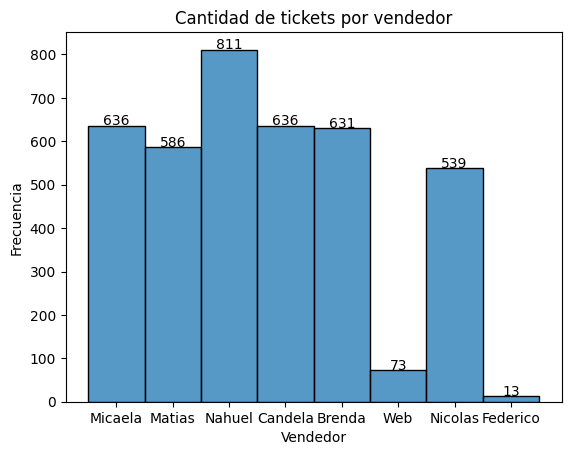

In [ ]:
# Histograma
ax = sns.histplot(data=df, x='usu_nombre_ped')

# Etiquetas
for p in ax.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    valor = int(y) # convertir a entero
    ax.text(x, y + 1, valor, ha='center')


plt.title('Cantidad de tickets por vendedor')
ax.set_xlabel('Vendedor')
ax.set_ylabel('Frecuencia')

Los tickets por vendedor son un indicador relevante de la actividad del vendedor, su iniciativa y actitud. En el periodo analizado (marzo a junio 2023) se destacan del resto los casos del vendedor Nahuel con 811 tickets, y de Federico, quien tiene sólo 13 tickets emitidos.

Distribución de precios por vendedor

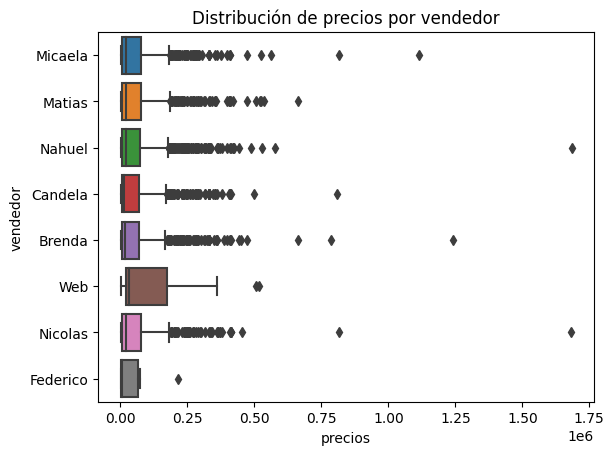

In [ ]:
sns.boxplot(y='usu_nombre_ped', x='art_pu', data=df_sin_nc)
plt.xlabel('precios')
plt.ylabel('vendedor')
plt.title('Distribución de precios por vendedor')
plt.show()


En la distribución de precios por vendedor podemos observar la amplitud en los precios de los artículos vendidos. El rango de precios se encuentra mayormente entre 200,000 y 500,000 pesos; en casos puntuales encontramos artículos con precios cercanos a $1,700,000.-

# Predicción de ventas

#Selección de características

**Coeficiente de correlación**

Cuando hablamos de coeficiente de correlación conocemos que los números entre $+1$ y $-1$ representa la interacción y la dirección de la relación entre dos variables. Las correlaciones que están más cerca de $+1$ y $-1$ se encuentran más relacionadas y son más capaces de predecir con precisión. La idea es que aquellas características que tienen una alta correlación con la variable dependiente son predictores fuertes cuando se usan en un modelo.



In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
correlation_matrix

<ipython-input-55-f700ed1d26f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,ped_codigo,art_poriva,fac_cantid,art_pu,proteccion,recargo,total_pesos,total_costo_pesos,art_costo_usd,art_pu_usd,proteccion_usd,recargo_usd,total_usd,total_costo_usd,fac_dolar,venta_neta,venta_neta_usd,rentabilidad,rentabilidad_usd
ped_codigo,1.00,0.03,0.65,0.18,0.03,0.02,0.18,0.19,0.15,0.15,0.02,0.02,0.15,0.16,0.70,0.18,0.15,0.14,0.12
art_poriva,0.03,1.00,-0.01,0.05,0.08,0.05,0.05,0.08,0.07,0.05,0.08,0.05,0.05,0.08,0.06,0.05,0.05,0.02,0.03
fac_cantid,0.65,-0.01,1.00,0.17,0.01,0.03,0.19,0.21,0.19,0.17,0.01,0.03,0.20,0.22,0.05,0.19,0.20,0.14,0.14
art_pu,0.18,0.05,0.17,1.00,0.43,0.18,0.99,0.97,0.97,1.00,0.43,0.18,0.99,0.96,0.03,0.99,0.99,0.92,0.93
proteccion,0.03,0.08,0.01,0.43,1.00,0.01,0.42,0.36,0.35,0.41,1.00,0.01,0.40,0.34,0.02,0.42,0.41,0.66,0.64
recargo,0.02,0.05,0.03,0.18,0.01,1.00,0.25,0.18,0.18,0.19,0.01,1.00,0.25,0.18,-0.01,0.18,0.19,0.15,0.15
total_pesos,0.18,0.05,0.19,0.99,0.42,0.25,1.00,0.98,0.96,0.99,0.42,0.24,1.00,0.97,0.03,1.00,0.99,0.92,0.93
total_costo_pesos,0.19,0.08,0.21,0.97,0.36,0.18,0.98,1.00,0.99,0.97,0.36,0.18,0.97,1.00,0.03,0.98,0.98,0.84,0.85
art_costo_usd,0.15,0.07,0.19,0.97,0.35,0.18,0.96,0.99,1.00,0.98,0.35,0.18,0.97,0.99,-0.01,0.97,0.97,0.83,0.84
art_pu_usd,0.15,0.05,0.17,1.00,0.41,0.19,0.99,0.97,0.98,1.00,0.41,0.19,0.99,0.97,-0.01,0.99,0.99,0.91,0.92


In [ ]:
# Filtrar las características con correlación mayor a 0.5 con respecto a "class"
selected_features = correlation_matrix[abs(correlation_matrix['rentabilidad']) > 0.8]['rentabilidad']

In [ ]:
selected_features

art_pu              0.92
total_pesos         0.92
total_costo_pesos   0.84
art_costo_usd       0.83
art_pu_usd          0.91
total_usd           0.91
total_costo_usd     0.83
venta_neta          0.93
venta_neta_usd      0.92
rentabilidad        1.00
rentabilidad_usd    1.00
Name: rentabilidad, dtype: float64

#Visualización

<ipython-input-378-3c688d0547e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rentabilidad'])


<Axes: xlabel='rentabilidad', ylabel='Density'>

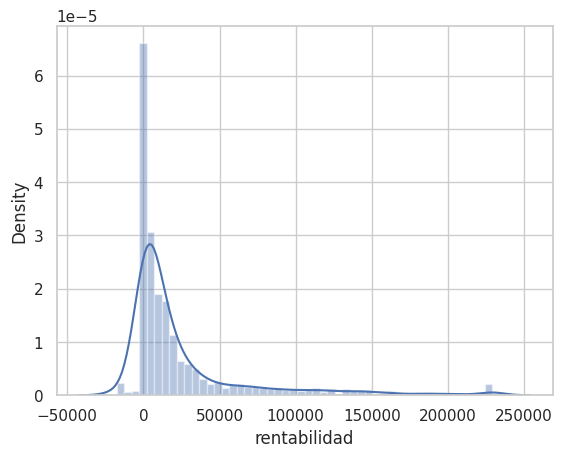

In [ ]:
sns.distplot(df['rentabilidad'])

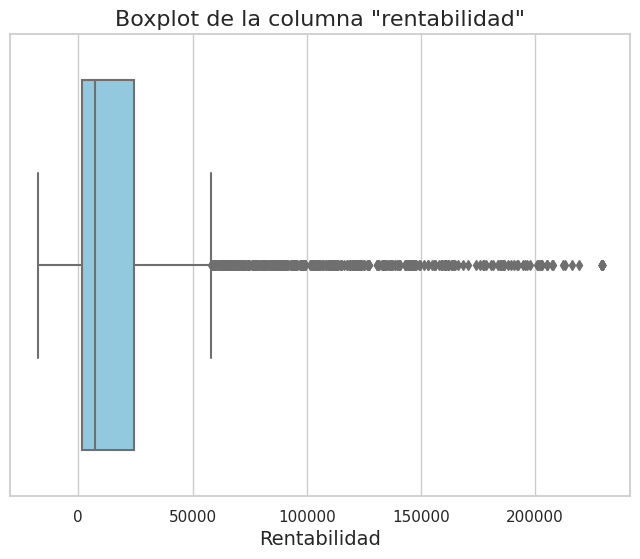

In [ ]:
sns.set(style="whitegrid")  # Estilo del gráfico

# Crea el boxplot de la columna "Rentabilidad"
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x=df['rentabilidad'], color='skyblue')  # Boxplot de la columna "Rentabilidad"
plt.xlabel('Rentabilidad', fontsize=14)  # Etiqueta del eje x
plt.title('Boxplot de la columna "rentabilidad"', fontsize=16)  # Título del gráfico
plt.show()  # Muestra el gráfico

### Tratamiento de outliers

Si tienes una columna de precios muy sesgada hacia la izquierda (cola larga en el lado izquierdo), es posible que tengas valores atípicos (outliers) en la parte superior de la distribución, lo que puede estar afectando negativamente el rendimiento de tus modelos o análisis posteriores. En este caso, es recomendable considerar el tratamiento de outliers para mejorar la calidad de tus análisis y modelos. Aquí hay algunas razones por las que el tratamiento de outliers puede ser beneficioso:

Mejora de la normalidad: Si la distribución está sesgada, muchos algoritmos de machine learning y técnicas estadísticas asumen una distribución normal de los datos. Al tratar los outliers, puedes acercar la distribución a una forma más normal, lo que podría mejorar la precisión de los modelos y análisis posteriores.

Reducción del impacto de los outliers: Los outliers extremos pueden tener un impacto desproporcionadamente grande en la estimación de estadísticas como la media y la desviación estándar. Al tratar los outliers, puedes reducir este impacto y obtener estadísticas más representativas de la mayoría de los datos.

Evitar problemas con ciertos modelos: Algunos algoritmos, como las regresiones lineales, son sensibles a los outliers y pueden verse afectados negativamente por su presencia. Al eliminar o transformar los outliers, puedes evitar problemas con estos modelos.

In [ ]:
# Calcula los percentiles 1 y 99 de la columna "Rentabilidad"
p1 = df['rentabilidad'].quantile(0.01)
p99 = df['rentabilidad'].quantile(0.99)

# Trunca los outliers en la columna "Price"
df['rentabilidad'] = df['rentabilidad'].clip(lower=p1, upper=p99)

# Ahora puedes utilizar el DataFrame 'df' con los outliers tratados para tu regresión lineal

<ipython-input-381-3c688d0547e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rentabilidad'])


<Axes: xlabel='rentabilidad', ylabel='Density'>

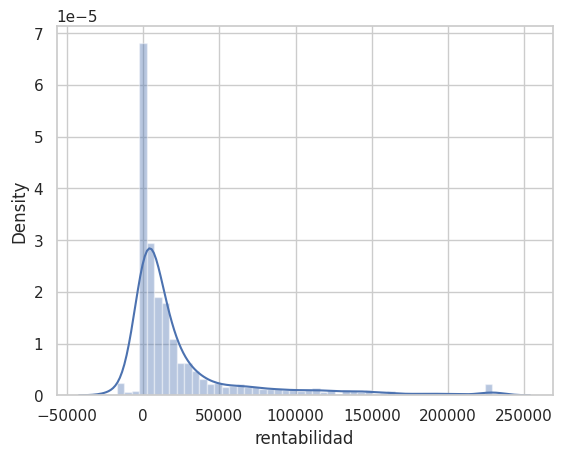

In [ ]:
sns.distplot(df['rentabilidad'])

Si tienes outliers en la columna "rentabilidad" y planeas utilizarla como variable objetivo en una regresión lineal, es importante tratar los outliers de manera adecuada para mejorar la calidad de tu modelo. Aquí te recomendaré una técnica común para tratar outliers en la variable objetivo, que es la truncación de valores extremos.

La truncación implica definir un rango válido para la variable objetivo (en este caso, "rentabilidad") y reemplazar los valores que están fuera de ese rango con los valores más cercanos dentro del rango. Para hacer esto, puedes utilizar los percentiles, como el percentil 1 y el percentil 99, para establecer el rango. Todos los valores por debajo del percentil 1 se reemplazarán con el valor del percentil 1, y todos los valores por encima del percentil 99 se reemplazarán con el valor del percentil 99.

<ipython-input-382-70cab6a88799>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['venta_neta'])


<Axes: xlabel='venta_neta', ylabel='Density'>

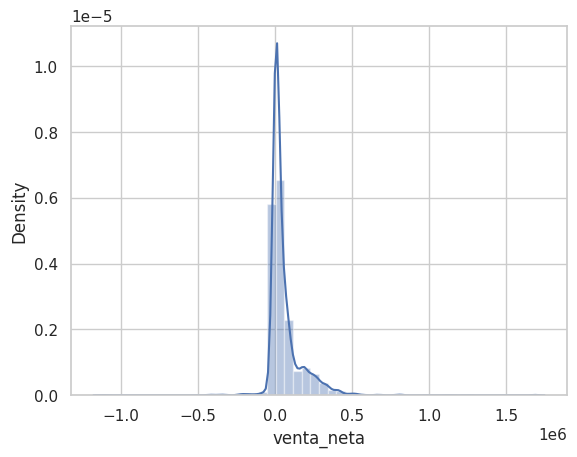

In [ ]:
sns.distplot(df['venta_neta'])

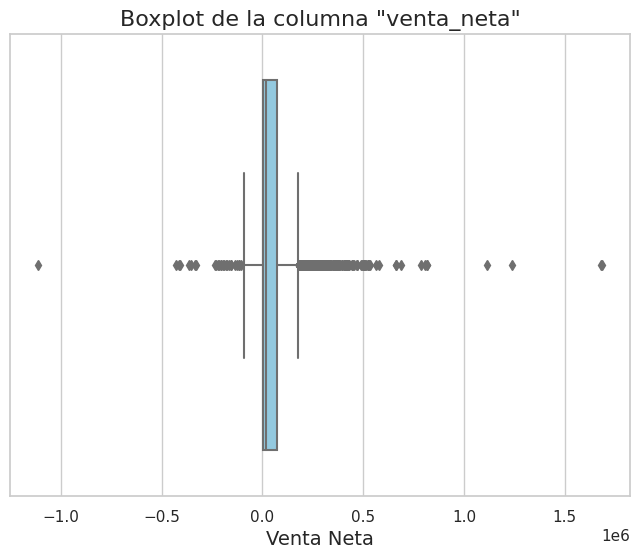

In [ ]:
sns.set(style="whitegrid")  # Estilo del gráfico

# Crea el boxplot de la columna "venta_neta"
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x=df['venta_neta'], color='skyblue')  # Boxplot de la columna "venta_neta"
plt.xlabel('Venta Neta', fontsize=14)  # Etiqueta del eje x
plt.title('Boxplot de la columna "venta_neta"', fontsize=16)  # Título del gráfico
plt.show()  # Muestra el gráfico

In [ ]:
# Calcula los percentiles 1 y 99 de la columna "Mileage"
p1 = df['venta_neta'].quantile(0.01)
p99 = df['venta_neta'].quantile(0.99)

# Trunca los outliers en la columna "Mileage"
df['venta_neta'] = df['venta_neta'].clip(lower=p1, upper=p99)

# Ahora puedes utilizar el DataFrame 'data' con los outliers tratados para tu regresión lineal

<ipython-input-385-70cab6a88799>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['venta_neta'])


<Axes: xlabel='venta_neta', ylabel='Density'>

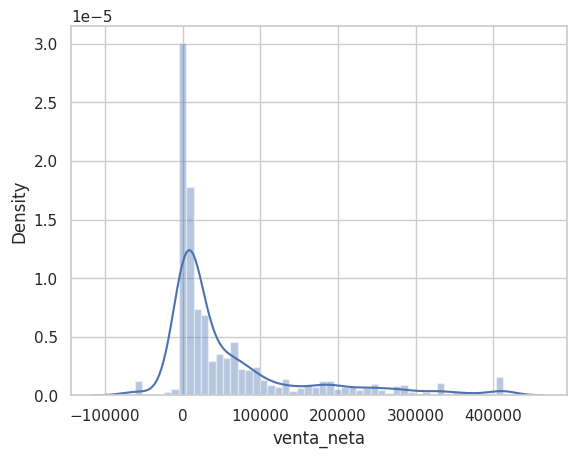

In [ ]:
sns.distplot(df['venta_neta'])

<ipython-input-386-bbe018c406ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['art_pu'])


<Axes: xlabel='art_pu', ylabel='Density'>

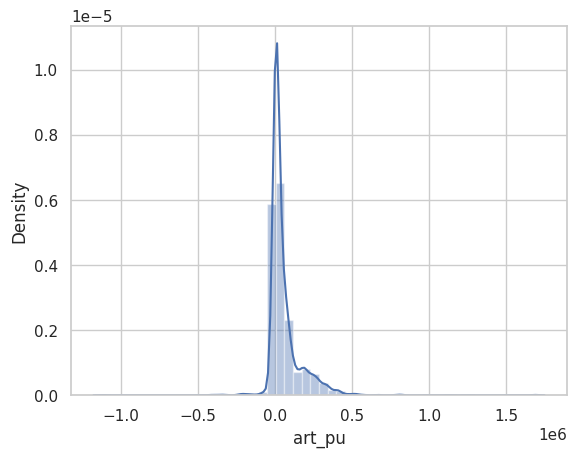

In [ ]:
sns.distplot(df['art_pu'])

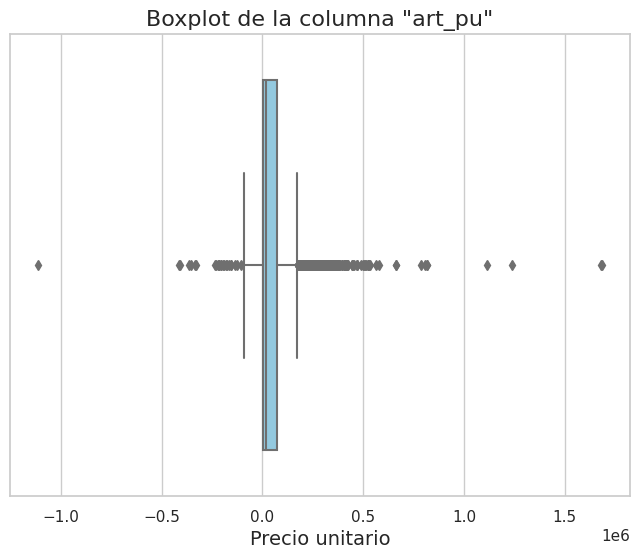

In [ ]:
sns.set(style="whitegrid")  # Estilo del gráfico

# Crea el boxplot de la columna "art_pu"
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x=df['art_pu'], color='skyblue')  # Boxplot de la columna "art_pu"
plt.xlabel('Precio unitario', fontsize=14)  # Etiqueta del eje x
plt.title('Boxplot de la columna "art_pu"', fontsize=16)  # Título del gráfico
plt.show()  # Muestra el gráfico

Tenemos que filtrar los valores por debajo de 0, ya que el data set incluye notas de crédito, las cuales debemos considerar para análisis de venta, pero distorsiona la medición del rango de precios de venta de los artículos

In [ ]:
import pandas as pd
import numpy as np
# Filtrar los valores menores a cero en la columna 'art_pu' y guardarlos en una columna nueva
df['art_pu_filtered'] = df['art_pu'].where(df['art_pu'] > 0, np.nan)

Boxplot con el precio unitario corregido a valores superiores a cero

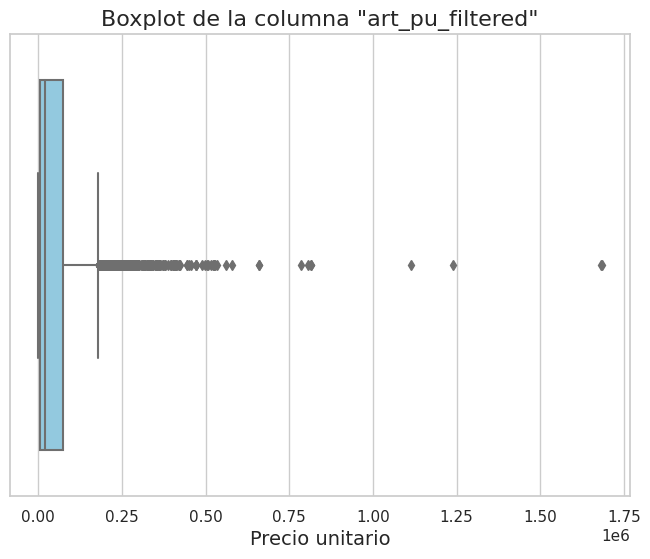

In [ ]:
sns.set(style="whitegrid")  # Estilo del gráfico

# Crea el boxplot de la columna "art_pu"
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x=df['art_pu_filtered'], color='skyblue')  # Boxplot de la columna "art_pu_filtered"
plt.xlabel('Precio unitario', fontsize=14)  # Etiqueta del eje x
plt.title('Boxplot de la columna "art_pu_filtered"', fontsize=16)  # Título del gráfico
plt.show()  # Muestra el gráfico

<ipython-input-390-8300e51b78f7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['art_pu_filtered'])


<Axes: xlabel='art_pu_filtered', ylabel='Density'>

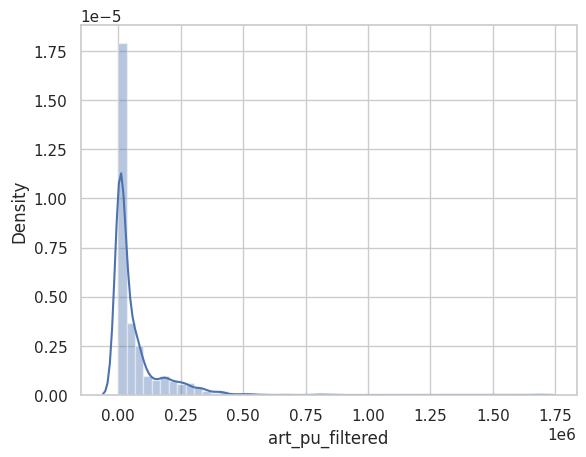

In [ ]:
sns.distplot(df['art_pu_filtered'])

<ipython-input-391-80851f6ae395>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['proteccion'])


<Axes: xlabel='proteccion', ylabel='Density'>

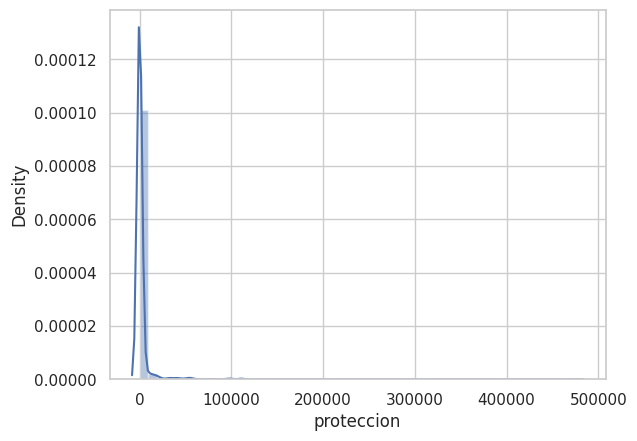

In [ ]:
sns.distplot(df['proteccion'])

In [ ]:
# Calcula los percentiles 1 y 99 de la columna "proteccion"
p1 = df['proteccion'].quantile(0.01)
p99 = df['proteccion'].quantile(0.99)

# Trunca los outliers en la columna "proteccion"
df['proteccion'] = df['proteccion'].clip(lower=p1, upper=p99)

# Ahora puedes utilizar el DataFrame 'df' con los outliers tratados para tu regresión lineal

<ipython-input-393-80851f6ae395>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['proteccion'])


<Axes: xlabel='proteccion', ylabel='Density'>

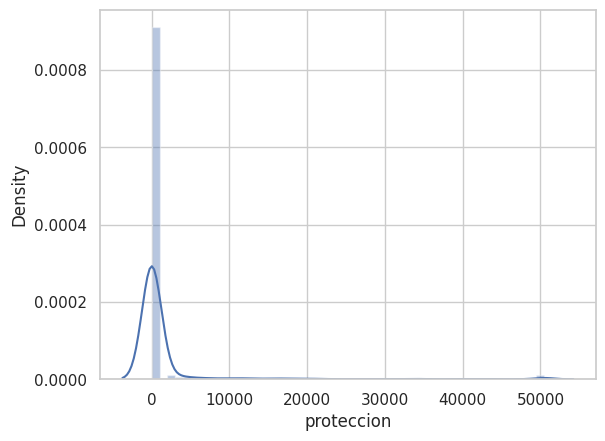

In [ ]:
sns.distplot(df['proteccion'])

In [ ]:
df.describe()

,ped_codigo,art_poriva,fac_cantid,art_pu,proteccion,recargo,total_pesos,total_costo_pesos,art_costo_usd,art_pu_usd,proteccion_usd,recargo_usd,total_usd,total_costo_usd,fac_dolar,venta_neta,venta_neta_usd,rentabilidad,rentabilidad_usd,art_pu_filtered
count,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3925.00,3809.00
mean,232546.69,17.88,0.97,59546.00,1362.84,1156.37,61467.78,36797.41,156.64,256.53,7.97,5.04,264.84,158.66,232.37,59589.55,259.80,24562.19,109.11,63630.72
std,55245.79,4.80,0.40,109122.91,6575.07,7446.34,112156.65,65387.16,275.38,463.21,58.06,32.42,476.72,279.43,18.26,92152.43,469.67,43064.70,237.50,105581.96
min,0.00,10.50,-2.00,-1113121.27,0.00,-37891.74,-1113121.00,-688669.07,-2664.10,-4306.08,0.00,-168.41,-4306.08,-2664.10,204.00,-61982.00,-4306.08,-17442.77,-1641.98,0.83
25%,205129.00,10.50,1.00,4048.76,0.00,0.00,4072.00,2388.70,10.78,16.91,0.00,0.00,17.27,10.85,217.00,4072.00,17.17,1608.44,6.96,4461.98
50%,231851.00,21.00,1.00,16650.68,0.00,0.00,18098.00,9448.09,41.29,74.99,0.00,0.00,79.26,42.24,229.00,18097.98,77.78,7278.90,32.08,19833.88
75%,273304.00,21.00,1.00,72397.29,0.00,0.00,74379.00,49160.84,219.50,306.80,0.00,0.00,316.34,221.15,245.00,74376.00,311.13,24227.23,103.78,74379.34
max,300517.00,21.00,5.00,1683926.45,50454.55,160219.83,1683926.00,836527.15,3527.17,6501.65,1834.14,715.27,6501.65,3527.17,267.00,413222.00,6501.65,229187.32,5105.96,1683926.45


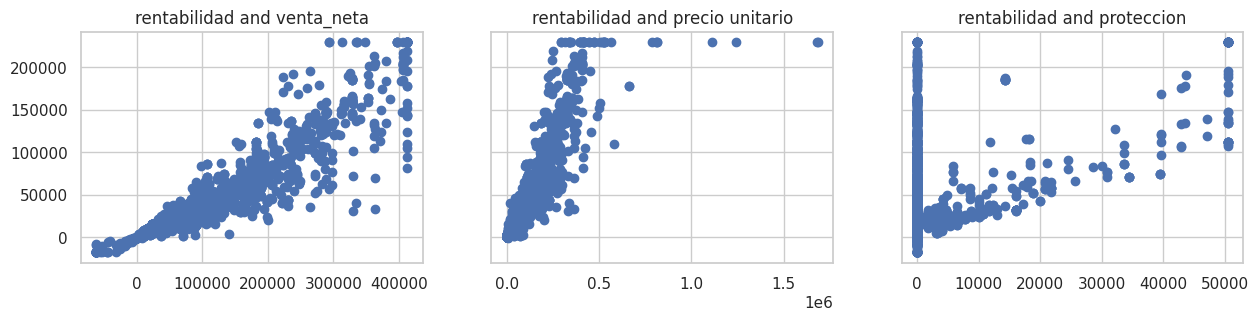

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'rentabilidad' as y
ax1.scatter(df['venta_neta'],df['rentabilidad'])
ax1.set_title('rentabilidad and venta_neta')
ax2.scatter(df['art_pu_filtered'],df['rentabilidad'])
ax2.set_title('rentabilidad and precio unitario')
ax3.scatter(df['proteccion'],df['rentabilidad'])
ax3.set_title('rentabilidad and proteccion')


plt.show()

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
correlation_matrix

<ipython-input-396-f700ed1d26f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,ped_codigo,art_poriva,fac_cantid,art_pu,proteccion,recargo,total_pesos,total_costo_pesos,art_costo_usd,art_pu_usd,proteccion_usd,recargo_usd,total_usd,total_costo_usd,fac_dolar,venta_neta,venta_neta_usd,rentabilidad,rentabilidad_usd,art_pu_filtered
ped_codigo,1.00,0.03,0.65,0.18,0.03,0.02,0.18,0.19,0.15,0.15,0.02,0.02,0.15,0.16,0.70,0.14,0.15,0.12,0.12,0.03
art_poriva,0.03,1.00,-0.01,0.05,0.11,0.05,0.05,0.08,0.07,0.05,0.08,0.05,0.05,0.08,0.06,0.06,0.05,0.02,0.03,0.05
fac_cantid,0.65,-0.01,1.00,0.17,0.02,0.03,0.19,0.21,0.19,0.17,0.01,0.03,0.20,0.22,0.05,0.15,0.20,0.12,0.14,-0.04
art_pu,0.18,0.05,0.17,1.00,0.31,0.18,0.99,0.97,0.97,1.00,0.43,0.18,0.99,0.96,0.03,0.92,0.99,0.89,0.93,1.00
proteccion,0.03,0.11,0.02,0.31,1.00,0.02,0.30,0.28,0.28,0.31,0.76,0.02,0.30,0.28,0.01,0.31,0.31,0.44,0.47,0.32
recargo,0.02,0.05,0.03,0.18,0.02,1.00,0.25,0.18,0.18,0.19,0.01,1.00,0.25,0.18,-0.01,0.21,0.19,0.20,0.15,0.18
total_pesos,0.18,0.05,0.19,0.99,0.30,0.25,1.00,0.98,0.96,0.99,0.42,0.24,1.00,0.97,0.03,0.92,0.99,0.89,0.93,0.99
total_costo_pesos,0.19,0.08,0.21,0.97,0.28,0.18,0.98,1.00,0.99,0.97,0.36,0.18,0.97,1.00,0.03,0.91,0.98,0.82,0.85,0.97
art_costo_usd,0.15,0.07,0.19,0.97,0.28,0.18,0.96,0.99,1.00,0.98,0.35,0.18,0.97,0.99,-0.01,0.91,0.97,0.82,0.84,0.97
art_pu_usd,0.15,0.05,0.17,1.00,0.31,0.19,0.99,0.97,0.98,1.00,0.41,0.19,0.99,0.97,-0.01,0.93,0.99,0.89,0.92,1.00


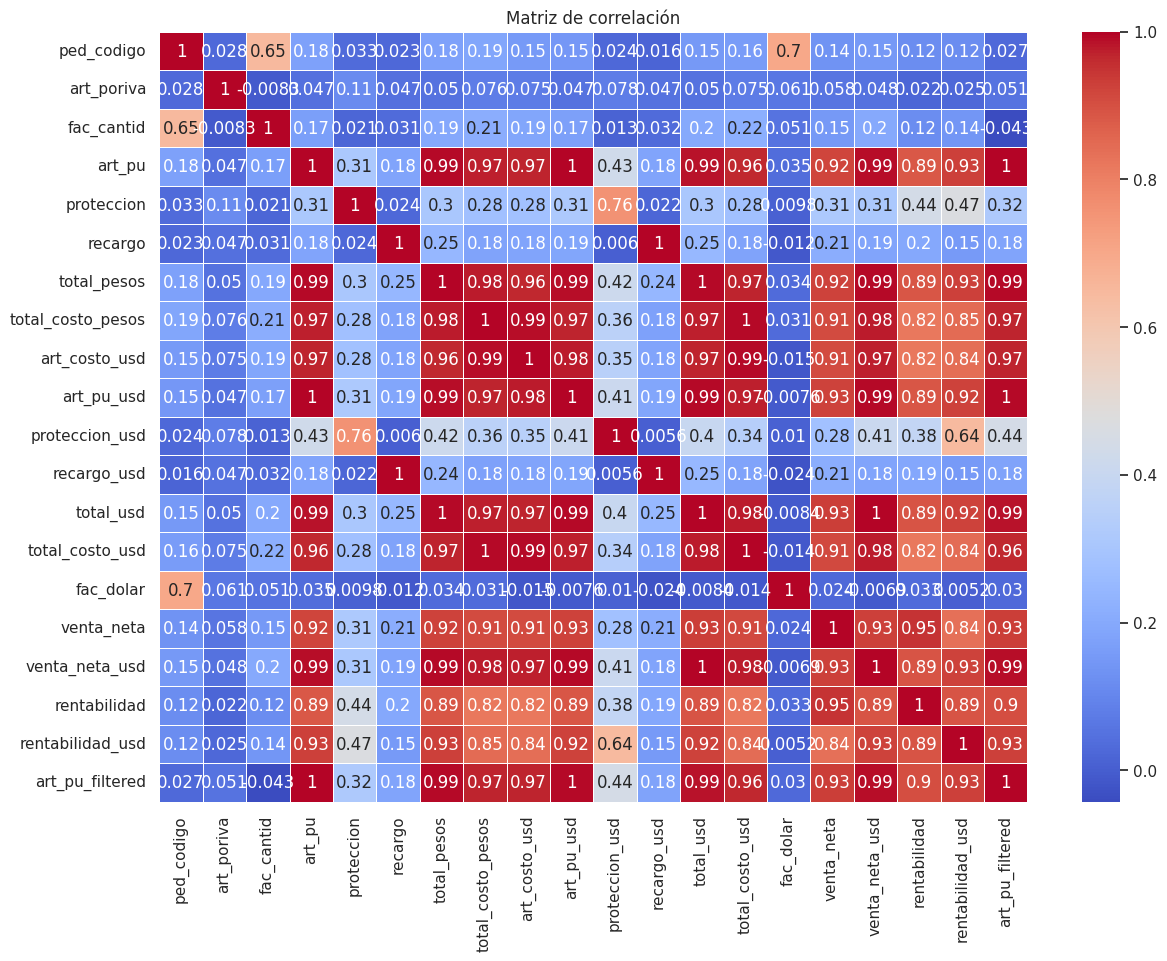

In [ ]:
# Crear el mapa de calor (heatmap)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Filtrar las características con correlación mayor a 0.5 con respecto a "rentabilidad"
selected_features = correlation_matrix[abs(correlation_matrix['rentabilidad']) > 0.9]['rentabilidad']

In [ ]:
selected_features

venta_neta        0.95
rentabilidad      1.00
art_pu_filtered   0.90
Name: rentabilidad, dtype: float64

Si quisiera aplicar seleccion con modelos deberia transformar los tipos de datos no numericos

In [ ]:
df.dtypes

fac_fecha            datetime64[ns]
ped_codigo                    int64
mar_descri                   object
unn_descri                   object
rubro                        object
art_numero                   object
art_descri                   object
art_poriva                  float64
fac_cantid                    int64
art_pu                      float64
proteccion                  float64
recargo                     float64
total_pesos                   int64
total_costo_pesos           float64
art_costo_usd               float64
art_pu_usd                  float64
proteccion_usd              float64
recargo_usd                 float64
total_usd                   float64
total_costo_usd             float64
usu_nombre_ped               object
cld_localidad                object
pro_descri                   object
depositoarmado               object
fac_tipmov                   object
fac_dolar                   float64
venta_neta                  float64
venta_neta_usd              

In [ ]:
df = df.dropna()

In [ ]:
# Ejemplo de codificación one-hot para las columnas
df_encoded = pd.get_dummies(df, columns=['fac_fecha', 'art_numero', 'art_descri', 'mar_descri', 'unn_descri', 'rubro'])
df_encoded.dtypes

ped_codigo                             int64
art_poriva                           float64
fac_cantid                             int64
art_pu                               float64
proteccion                           float64
                                      ...   
rubro_XIAOMI Auriculares               uint8
rubro_XIAOMI Cargadores Celulares      uint8
rubro_XIAOMI Celulares                 uint8
rubro_XIAOMI Parlantes Portables       uint8
rubro_XIAOMI Smartwatch                uint8
Length: 1614, dtype: object

**Backward Elimination.**

Al principio le brindamos todas las características posibles al modelo. Verificamos el rendimiento del modelo y luego eliminamos iterativamente las características de peor rendimiento una por una hasta que el rendimiento general del modelo se encuentre en un rango aceptable.


 *Intenté utilizar este método para seleccionar características, para aprender a aplicarlo. En principio me dió un error debido a que una columna había quedado como object luego de la codificación one-hot. Luego de corregirlo, volví a correrlo varias veces, pero se quedó procesando bastante tiempo (lo dejé más de 10 minutos, intenté en otros web browser) sin mostrar ningún resultado ni error. Aún no tuve tiempo para investigar y determinar cuál es el motivo de este comportamiento.

In [ ]:
# Función para realizar Backward Elimination
"""def backward_elimination(data, target_column, significance_level=0.05):
    features = data.drop(target_column, axis=1)
    target = data[target_column]
    num_features = len(features.columns)
    while True:
        model = sm.OLS(target, features).fit()
        max_p_value = max(model.pvalues)
        if max_p_value > significance_level:
            max_feature_idx = model.pvalues.idxmax()
            features = features.drop(max_feature_idx, axis=1)
        else:
            break
    return features"""

"""
# Aplicar Backward Elimination al DataFrame
selected_features = backward_elimination(df_encoded, target_column='rentabilidad')

# Mostrar las características seleccionadas
print("Características seleccionadas:", selected_features.columns)"""

'\n# Aplicar Backward Elimination al DataFrame\nselected_features = backward_elimination(df_encoded, target_column=\'rentabilidad\')\n\n# Mostrar las características seleccionadas\nprint("Características seleccionadas:", selected_features.columns)'

# Elección del modelo

Vamos a aplicar el modelo de regresión lineal para estimar la rentabilidad futura en base a los datos actuales.

In [ ]:
import statsmodels.api as sm
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 0 to 3925
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fac_fecha          3671 non-null   datetime64[ns]
 1   ped_codigo         3671 non-null   int64         
 2   mar_descri         3671 non-null   object        
 3   unn_descri         3671 non-null   object        
 4   rubro              3671 non-null   object        
 5   art_numero         3671 non-null   object        
 6   art_descri         3671 non-null   object        
 7   art_poriva         3671 non-null   float64       
 8   fac_cantid         3671 non-null   int64         
 9   art_pu             3671 non-null   float64       
 10  proteccion         3671 non-null   float64       
 11  recargo            3671 non-null   float64       
 12  total_pesos        3671 non-null   int64         
 13  total_costo_pesos  3671 non-null   float64       
 14  art_cost

Crear df de rentabilidad por venta

In [ ]:
df_rentabilidad_por_venta = df[['venta_neta', 'rentabilidad']]
df_rentabilidad_por_venta

,venta_neta,rentabilidad
0,247933.00,116120.62
1,21486.00,8502.16
2,14478.00,5416.07
3,24792.00,11519.25
4,17736.00,6869.37
...,...,...
3921,128759.00,28569.21
3922,6594.00,2001.81
3923,2230.00,1540.87
3924,4072.00,1033.57


En este caso utilizaremos como primer acercamiento a la regresión lineal, dos parámetros que suelen tener una alta correlación en el ámbito comercial: venta neta y rentabilidad

La variable independiente sería el volumen de venta neta, que es la venta bruta sin el recargo financiero. Este parámetro se considera independiente porque se supone que no siempre está influenciado directamente por el rentabilidad, sino que también es el resultado de la interacción con otros factores, como el costo del artículo, rubro, protección comercial, financiación, entre otros.


La variable dependiente sería la rentabilidad, que es la venta bruta mas la proteccion comercial, menos el costo del articulo vendido.


In [ ]:
# Definir variables y=b0*x+b1
y=df_rentabilidad_por_venta['rentabilidad']
x1=df_rentabilidad_por_venta['venta_neta']

In [ ]:
x1

0      247933.00
1       21486.00
2       14478.00
3       24792.00
4       17736.00
          ...   
3921   128759.00
3922     6594.00
3923     2230.00
3924     4072.00
3925     4071.00
Name: venta_neta, Length: 3671, dtype: float64

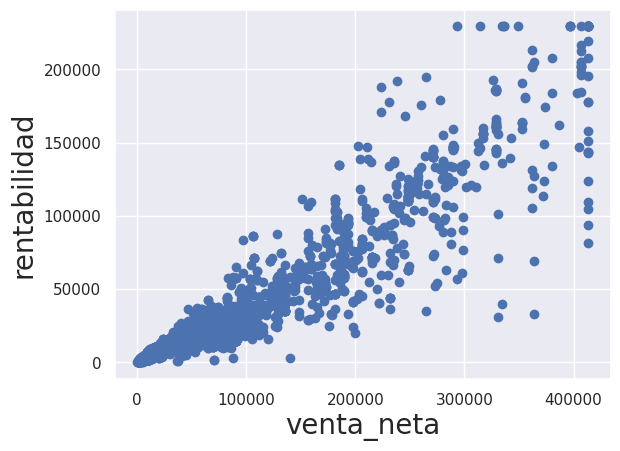

In [ ]:
# Explorar relación
plt.scatter(x1,y)
plt.xlabel('venta_neta', fontsize = 20)
plt.ylabel('rentabilidad', fontsize = 20)
plt.show()

Con las siguientes formulas lo que vamos hacer es:

x = sm.add_constant(x): Esta línea agrega una columna de unos a la matriz x. En el contexto de regresión lineal, esto se hace para incorporar la constante (intercepto) en el modelo de regresión. La variable x debe ser una matriz que contenga las variables independientes (predictoras) que se utilizarán en el análisis de regresión. Después de agregar la constante, la matriz x tendrá una columna adicional de unos al comienzo.
En el contexto de la regresión lineal, un modelo típico se representa como:

y = b0 + b1x1 + b2x2 + ... + bn*xn + error

Donde:

y es la variable dependiente que deseamos predecir.
x1, x2, ..., xn son las variables independientes (predictoras) que utilizaremos para hacer la predicción.
b0 es el coeficiente de la constante, también conocida como el intercepto.
b1, b2, ..., bn son los coeficientes asociados con las variables independientes.
error es el término de error, que representa la diferencia entre el valor real de y y el valor predicho por el modelo.
En el análisis de regresión lineal, se busca estimar los coeficientes b0, b1, b2, ..., bn que mejor ajusten los datos observados. Una forma común de hacer esto es utilizando el método de mínimos cuadrados ordinarios (OLS).
Sin embargo, en la forma mencionada anteriormente, el término independiente b0 se encuentra multiplicado por uno. Para incorporar de manera adecuada el término independiente en la matriz x, se agrega una columna de unos al inicio de la matriz. Esto se hace mediante la función sm.add_constant(x), proporcionada por la biblioteca statsmodels.

Entonces, después de ejecutar x = sm.add_constant(x), la matriz x tendrá una columna adicional de unos al comienzo, lo que nos permite estimar adecuadamente el coeficiente de la constante b0 durante el ajuste del modelo de regresión lineal.

results = sm.OLS(y, x).fit(): Aquí se ajusta el modelo de regresión lineal. y debe ser un vector que contenga la variable dependiente (variable a predecir) y x es la matriz que contiene las variables independientes, incluida la columna de unos agregada en el paso anterior. sm.OLS se refiere a Ordinary Least Squares (OLS), que es el método utilizado para estimar los coeficientes en el análisis de regresión lineal. fit() es el método que realiza el ajuste del modelo a los datos. Después de ajustar el modelo, los resultados se guardan en la variable results.

results.summary(): Finalmente, esta línea muestra un resumen de los resultados del análisis de regresión lineal. El resumen incluirá información relevante sobre el modelo, como los coeficientes estimados para las variables independientes, el valor R-cuadrado (una medida de ajuste del modelo), estadísticas de prueba, p-valores, intervalos de confianza, entre otros.

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rentabilidad   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 3.157e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:02:34   Log-Likelihood:                -40196.
No. Observations:                3671   AIC:                         8.040e+04
Df Residuals:                    3669   BIC:                         8.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2109.4310    274.077     -7.697      0.000   -2646.788   -1572.074
venta_neta     0.4424      0.002    177.676      0.000       0.437       0.447
==============================================================================
Omnibus:                      855.652   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33382.437
Skew:                          -0.323   Prob(JB):                         0.00
Kurtosis:                      17.759   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Los modelos tendrán tres tablas principales:
1. un resumen del modelo
2. una tabla de coeficientes
3. algunas pruebas adicionales

* La parte mas importante para nosotros es la "tabla de coeficientes" con esta tabla construimos la linea de regresion.
Nos sirve la ecuacion de la regresion para estimar valores de GPA.

* Los errores estándar muestran la precisión de la predicción para cada variable, cuanto menor sea el error estándar, mejor.

* Los dos siguientes valores son el estadístico t y su valor P, si has seguido nuestro programa hasta ahora, sabrás que hay una hipótesis involucrada aquí.

**La hipótesis nula de esta prueba es que beta es igual a cero**

* Si un coeficiente es cero para la intersección B cero, entonces la línea cruza el eje Y en el origen.
* Si beta uno es cero, entonces cero multiplicado por X siempre será cero para cualquier valor de X, por lo que esta variable no será considerada para el modelo. Gráficamente, esto significa que la línea de regresión sería horizontal, siempre pasando a través del valor del intercepto. En otras palabras, la variable con un coeficiente beta igual a cero no tiene un efecto significativo en el modelo de regresión.

**Estos valores nos permiten responder ¿Es esta una variable útil? tanto para el coeificiente o b0 y para el b1 que multiplica a x. Esto lo podemos ver desde la variable p: Como sabemos, un valor P por debajo de cero punto cero cinco significa que la variable es significativa.**

`Conclusion: el b1 es significativo, el b0 no. `

Otro valor de importancia de la tabla es el R2: que indica que tan buena es la regresion para este modelo, en otras palabras que tan bien se ajustaa el modelo de regresion lineal a tus datos. Mientras mas cerca de 1 el R2 mas explica tus datos un modelo de regresion lineal.

Nuestra regresión tuvo un R-cuadrado de cero punto cuatro cero seis, o en otras palabras, las puntuaciones SAT explicaron el cuarenta y uno por ciento de la variabilidad de las calificaciones universitarias en nuestra muestra. Y un R-cuadrado del cuarenta y uno por ciento no es ni bueno ni malo, pero dado que está lejos del noventa por ciento, podemos concluir que nos falta información importante.

Otros determinantes deben ser considerados como variables, como género, ingresos y estado civil, que podrían ayudarnos a comprender mejor el panorama completo. Cuanto más factores incluyas en tu regresión, mayor será el R-cuadrado.

Las estadisticas que nos importan para la grafica de la linea sobre el scatterplot:

y= 	0.4453*venta_neta + (-2174.9137)

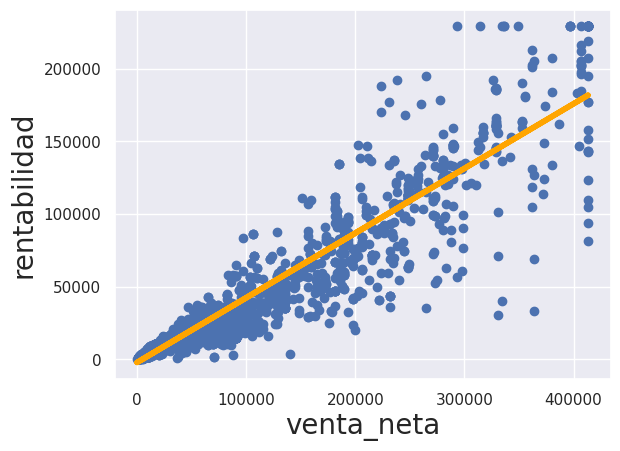

In [ ]:
x1=df_rentabilidad_por_venta['venta_neta']

plt.scatter(x1,y)
# Definir la ecuación
yhat = 0.4453*x1 + (-2174.9137)

fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regresion lineal')

plt.xlabel('venta_neta', fontsize = 20)
plt.ylabel('rentabilidad', fontsize = 20)
plt.show()

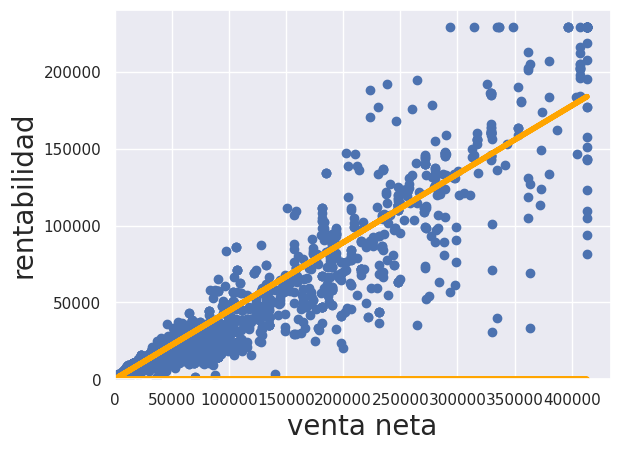

In [ ]:
plt.scatter(x1,y)
# Definir la ecuación
yhat = 0.4453*x + 0

fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regresion lineal')

plt.xlabel('venta neta', fontsize = 20)
plt.ylabel('rentabilidad', fontsize = 20)
plt.xlim(0)
plt.ylim(0)
plt.show()

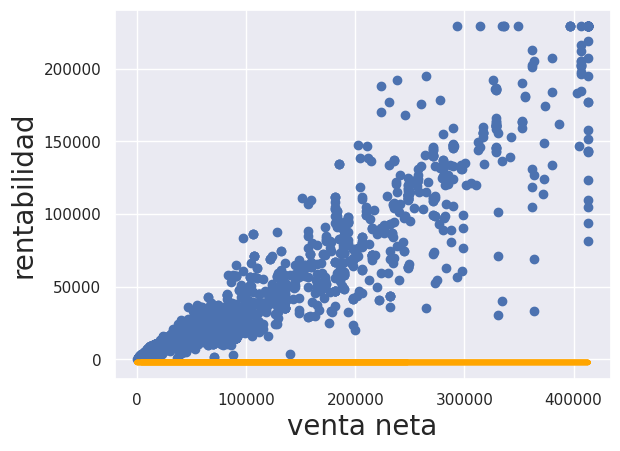

In [ ]:
plt.scatter(x1,y)
# Definir la ecuación
yhat = 0*x + (-2174.9137)

fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regresion lineal')

plt.xlabel('venta neta', fontsize = 20)
plt.ylabel('rentabilidad', fontsize = 20)
plt.show()

Regresión lineal múltiple

In [ ]:
multiple = df[['rentabilidad', 'venta_neta', 'recargo']]
multiple

,rentabilidad,venta_neta,recargo
0,116120.62,247933.00,0.00
1,8502.16,21486.00,0.00
2,5416.07,14478.00,0.00
3,11519.25,24792.00,0.00
4,6869.37,17736.00,0.00
...,...,...,...
3921,28569.21,128759.00,0.00
3922,2001.81,6594.00,0.00
3923,1540.87,2230.00,0.00
3924,1033.57,4072.00,0.00


In [ ]:
y = multiple ['rentabilidad']
x1 = multiple [['venta_neta','recargo']]

In [ ]:
x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rentabilidad   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 1.578e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:02:36   Log-Likelihood:                -40196.
No. Observations:                3671   AIC:                         8.040e+04
Df Residuals:                    3668   BIC:                         8.042e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2107.2316    274.143     -7.687      0.000   -2644.720   -1569.743
venta_neta     0.4426      0.003    173.720      0.000       0.438       0.448
recargo       -0.0153      0.032     -0.481      0.631      -0.078       0.047
==============================================================================
Omnibus:                      857.535   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33479.319
Skew:                          -0.327   Prob(JB):                         0.00
Kurtosis:                      17.780   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El R2 Ajustado se usa para comparar si adherir una variable nueva a la regresion lineal simple mejora o no la prediccion. En este caso no aporta nada, el R cuadrado ajustado es la base para comparar modelos de regresión una vez más. Solo tiene sentido comparar dos modelos que consideren la misma variable dependiente y utilicen el mismo conjunto de datos.

Manejo de variables categoricas

En este caso, para aplicar el manejo de variables categoricas, voy a tomar la columna de armado de pedido ('depositoarmado') para comparar la influencia de la venta web en la rentabilidad y categorizarla del siguiente modo:


'WEB'=1
'GBA'=0


In [ ]:
categoricas = df[['rentabilidad', 'venta_neta', 'depositoarmado']]
categoricas

,rentabilidad,venta_neta,depositoarmado
0,116120.62,247933.00,GBA
1,8502.16,21486.00,GBA
2,5416.07,14478.00,GBA
3,11519.25,24792.00,GBA
4,6869.37,17736.00,GBA
...,...,...,...
3921,28569.21,128759.00,GBA
3922,2001.81,6594.00,GBA
3923,1540.87,2230.00,GBA
3924,1033.57,4072.00,GBA


In [ ]:
categoricas['depositoarmado'] = categoricas['depositoarmado'].map({'WEB':1, 'GBA':0})

<ipython-input-126-02fba49211b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricas['depositoarmado'] = categoricas['depositoarmado'].map({'WEB':1, 'GBA':0})


In [ ]:
categoricas.head()

,rentabilidad,venta_neta,depositoarmado
0,116120.62,247933.00,0
1,8502.16,21486.00,0
2,5416.07,14478.00,0
3,11519.25,24792.00,0
4,6869.37,17736.00,0


In [ ]:
categoricas.shape

(3671, 3)

In [ ]:
# Ahora si podemos aplicar el modelo de regresion

In [ ]:
y = categoricas['rentabilidad']

x1 = categoricas[['venta_neta','depositoarmado']]

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rentabilidad   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 3.157e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:02:36   Log-Likelihood:                -40196.
No. Observations:                3671   AIC:                         8.040e+04
Df Residuals:                    3669   BIC:                         8.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2109.4310    274.077     -7.697      0.000   -2646.788   -1572.074
venta_neta         0.4424      0.002    177.676      0.000       0.437       0.447
depositoarmado          0          0        nan        nan           0           0
==============================================================================
Omnibus:                      855.652   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33382.437
Skew:                          -0.323   Prob(JB):                         0.00
Kurtosis:                      17.759   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Ahora podemos crear una regresión que explique la rentabilidad, considerando tanto la venta neta como el canal utilizado (web o sucursal física). La regresión se verá así: rentabilidad = -2228.1052 + 0.4450 * venta_neta + 3930.9107 * dummy.

Nuevamente, debemos usar el método de statsmodel para agregar una constante y luego ajustar la regresión y obtener el resumen como antes.

El resultado es el siguiente: nuestro modelo general es significativo, la venta neta y la variable dummy son significativas. El R ajustado de este modelo es 0.897, lo que no representa una gran mejora respecto al modelo original sin la variable dummy.

Podemos representar esta ecuación con dos casos diferentes, si la venta se realizó en la sucursal física (dummy = 0), entonces el modelo se simplifica a: rentabilidad = -2228.1052 + 0.4450 * venta neta. Si la venta se generó via web (dummy = 1), entonces el modelo se simplifica a: rentabilidad = 1702.8055 + 0.4450 * venta neta.

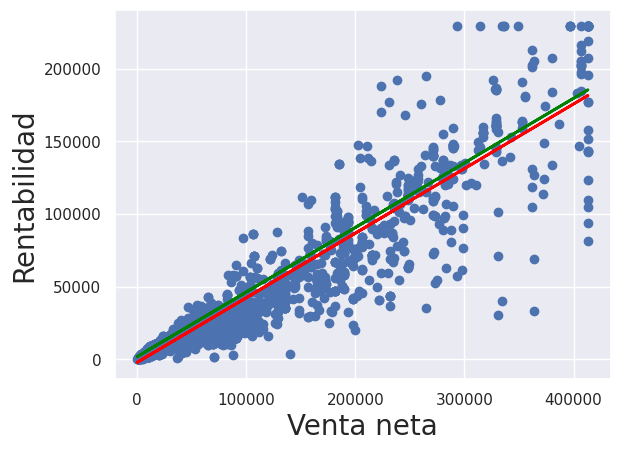

In [ ]:
plt.scatter(categoricas['venta_neta'],y)
# Definir dos ecuaciones, si atiende o no atiende
yhat_gba =  -2228.1052 + 0.4450*categoricas['venta_neta']
yhat_web = 1702.8055 + 0.4450*categoricas['venta_neta']

fig = plt.plot(categoricas['venta_neta'],yhat_gba, lw=2, c='red')
fig = plt.plot(categoricas['venta_neta'],yhat_web, lw=2, c='green')

plt.xlabel('Venta neta', fontsize = 20)
plt.ylabel('Rentabilidad', fontsize = 20)
plt.show()

Podemos graficar los datos y representar las dos ecuaciones con dos líneas diferentes. Las ventas web se distribuyen alrededor de la línea superior (verde). En promedio, su rentabilidad bruta es ligeramente más alta que la rentabilidad de las ventas realizadas en sucursales físicas.

**Virginia: Cómo determino con precisión la diferencia en los resultados???**

In [ ]:
# Crear un nuevo data set idéntico en organización a X, pero con valores nuevos.
# La constante siempre es 1, mientras que cada línea corresponde a una observación (estudiante).

new_data = pd.DataFrame({'const': 1, 'venta_neta': [1700, 1670], 'depositoarmado': [0, 1]})

# Por defecto, cuando creas un dataframe (df) (no cuando lo cargas, sino cuando lo creas), las columnas se ordenan alfabéticamente.
# Así que si no las reorganizamos, serían 'depositoarmado', 'const', 'venta_neta'.
# Si las proporcionas en el orden incorrecto, obtendrás resultados incorrectos.
new_data = new_data[['const', 'venta_neta', 'depositoarmado']]
new_data

,const,venta_neta,depositoarmado
0,1,1700,0
1,1,1670,1


In [ ]:
predictions = results.predict(new_data)

predictions

0   -2553.69
1    -916.58
dtype: float64

# Evaluación del modelo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seleccionar las columnas que serán las variables independientes
independent_variables = df[['proteccion', 'venta_neta', 'usu_nombre_ped']]

# Codificar la columna 'Brand' utilizando one-hot encoding
independent_variables_encoded = pd.get_dummies(independent_variables, columns=['usu_nombre_ped'])

# Seleccionar la columna que será la variable dependiente
dependent_variable = df['rentabilidad']

# Dividir el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(independent_variables_encoded, dependent_variable, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
predictions = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Error Cuadrático Medio (MSE):", mse)



Error Cuadrático Medio (MSE): 180859023.01234987


Dado que el MSE es una medida de la discrepancia entre las predicciones y los valores reales, un MSE más bajo indica que el modelo tiene un mejor ajuste y realiza predicciones más precisas. En este caso, el valor del MSE es bastante grande (alrededor de 187 millones), lo que sugiere que las predicciones del modelo tienen una discrepancia significativa con los valores reales.

Para tener una mejor comprensión del rendimiento del modelo, es importante comparar el valor del MSE con el rango de los valores de la variable dependiente (rentabilidad). Si el MSE es considerablemente mayor que la varianza natural de los datos de rentabilidad, podría ser indicativo de un mal ajuste del modelo. Sin embargo, es esencial tener en cuenta el contexto y el dominio del problema para interpretar adecuadamente la magnitud del MSE.

Varianza natural de la rentabilidad: 3221673067.6434608


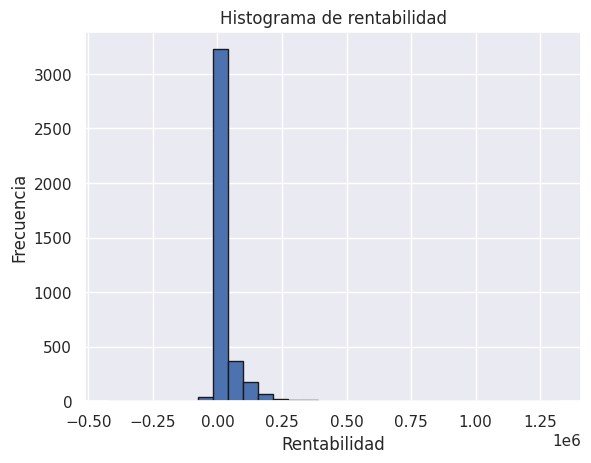

In [ ]:
import numpy as np


# Calcular la varianza natural de la columna 'Price'
variance_renta = np.var(df['rentabilidad'])
print("Varianza natural de la rentabilidad:", variance_renta)

# Visualizar el histograma de 'rentabilidad'
plt.hist(df['rentabilidad'], bins=30, edgecolor='k')
plt.xlabel('Rentabilidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de rentabilidad')
plt.show()

* Si el MSE es mucho menor que la Varianza Natural, podría indicar que el modelo está haciendo predicciones muy precisas y que el ajuste es bueno en relación con la variabilidad natural de los precios.
* Si el MSE es comparable o ligeramente menor que la Varianza Natural, el modelo puede estar realizando predicciones razonablemente precisas, pero aún hay margen para mejorar el ajuste.
* Si el MSE es mucho mayor que la Varianza Natural, podría indicar que el modelo está realizando predicciones que difieren significativamente de la variabilidad natural de los precios, lo que puede indicar un mal ajuste o problemas en la selección de características o en la calidad de los datos.

Con los valores proporcionados del Error Cuadrático Medio (MSE) y la Varianza Natural de 'rentabilidad', podemos concluir lo siguiente:

El MSE (187,698,433.84) es aproximadamente una décima parte de la Varianza Natural de 'rentabilidad' (1,873,732,498.17). Esto indica que el modelo está haciendo predicciones muy precisas y que el ajuste es bueno en relación con la variabilidad natural de los precios.



Adicionalmente, se podrían considerar las siguientes acciones para mejorar el rendimiento del modelo, en caso de ser necesario:

Reevaluar las características seleccionadas: Es posible que algunas características relevantes no estén incluidas en el modelo o que algunas características no sean relevantes y estén afectando negativamente las predicciones.

Considerar otras características: Puede ser beneficioso explorar la inclusión de otras características que puedan tener una influencia significativa en los precios de los automóviles.a rentabilidad.

Probar modelos más complejos: Dependiendo de la complejidad del problema y los datos disponibles, podría ser útil probar modelos más avanzados o complejos que puedan capturar mejor las relaciones no lineales entre las características y el precio.

Evaluación adicional: Es importante realizar una evaluación más detallada del rendimiento del modelo utilizando otras métricas de evaluación, gráficos de residuos y análisis de sensibilidad.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de Determinación (R²):", r2)


Coeficiente de Determinación (R²): 0.9566777870302271


#Conclusiones

El valor de R² es aproximadamente 0.95, lo que indica que el modelo de regresión lineal múltiple explica aproximadamente el 95.66% de la variabilidad de los precios (variable dependiente 'rentabilidad') en el conjunto de datos de prueba. En otras palabras, alrededor del 95.66% de la variabilidad en la rentabilidad puede ser explicada por las características (variables independientes) utilizadas en el modelo.

Este valor de R² sugiere que el modelo tiene un ajuste alto a los datos. Sin embargo, aún queda alguna cantidad de variabilidad en la rentabilidad que no está siendo capturada por el modelo. Es posible que existan otras características importantes o relaciones no lineales que no están siendo consideradas en el modelo actual.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'fit_intercept': [True, False]
}

# Crear el modelo de regresión lineal
model = LinearRegression()

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el modelo final en el conjunto de prueba
predictions = best_model.predict(X_test)



Después de realizar la optimización de hiperparámetros con GridSearchCV, ya has encontrado los mejores valores de los hiperparámetros para tu modelo de regresión lineal. El proceso de optimización ayuda a encontrar los valores que maximizan o minimizan la métrica de evaluación que hayas definido (en este caso, estamos minimizando el Error Cuadrático Medio, MSE).

Una vez que se ha realizado la optimización, ya tienes el "mejor modelo" (best_model) con los hiperparámetros óptimos. Ahora, puedes evaluar este modelo final en el conjunto de prueba (X_test, y_test) para obtener una estimación realista de cómo se desempeña en datos no vistos.

In [ ]:
# Evaluar el modelo final en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, predictions)
print("Error Cuadrático Medio (MSE) del modelo final:", mse)

# Calcular el Coeficiente de Determinación (R²) en el conjunto de prueba
r2 = r2_score(y_test, predictions)
print("Coeficiente de Determinación (R²) del modelo final:", r2)


Error Cuadrático Medio (MSE) del modelo final: 180859023.01234987
Coeficiente de Determinación (R²) del modelo final: 0.9566777870302271


Si el rendimiento del modelo después de la optimización de hiperparámetros no mejora o no cumple con los criterios de rendimiento deseados, hay algunas acciones que puedes considerar:

* Considerar otros modelos: Es posible que la regresión lineal no sea el modelo más adecuado para tu problema en particular. Prueba otros modelos de regresión más complejos o incluso métodos de aprendizaje automático no lineales, como árboles de decisión, máquinas de soporte vectorial (SVM) o modelos de ensamble (Random Forest, Gradient Boosting, etc.), para ver si mejoran el rendimiento.

* Refinar la calidad de los datos: Verifica la calidad y limpieza de los datos. Los valores atípicos (outliers) y datos incorrectos pueden afectar negativamente el rendimiento del modelo. Realiza una limpieza y preprocesamiento adecuados de los datos para asegurarte de que estén en buenas condiciones para el modelado.

* Evaluar el tamaño del conjunto de datos: El rendimiento del modelo puede mejorar con más datos de entrenamiento si el tamaño del conjunto de datos es limitado. Si es posible, intenta recopilar más datos para mejorar la generalización del modelo.

* Ajustar la complejidad del modelo: En algunos casos, el modelo podría estar sobreajustando (overfitting) o infraajustando (underfitting) los datos. Ajustar la complejidad del modelo puede ayudar a encontrar un equilibrio entre el sesgo y la varianza, mejorando así el rendimiento general.